# Q1

## Section 0. Load the dataset and preprocessing

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df_raw = pd.read_csv('SpinalCord_clustering_rawCounts.csv').iloc[:, 1:]
df_trans = pd.read_csv('SpinalCord_clustering_CLR_Transform.csv').iloc[:, 1:]
df_trans.head()

Orginal_Label      Fcnb      Gzma      Ccl5      Lyz2     Top2a  Hist1h2an  \
0              0 -0.135121 -0.214437 -0.377861 -0.659284 -0.143685  -0.279949   
1              0 -0.135121 -0.214437 -0.377861 -0.324187 -0.143685  -0.279949   
2              0 -0.135121 -0.214437 -0.377861  0.131526 -0.143685   1.204623   
3              0 -0.135121 -0.214437 -0.377861  0.790620 -0.143685  -0.279949   
4              0  1.413587 -0.214437  0.022287  0.688214 -0.143685  -0.279949   

   ENSRNOG00000066616       Mt3     Ube2c  ...    Zfp606    Rundc1  Osbpl5  \
0           -0.159577  0.412189 -0.144663  ... -0.138328 -0.138328 -0.1218   
1           -0.159577 -0.277492 -0.144663  ... -0.138328 -0.138328 -0.1218   
2           -0.159577 -0.277492 -0.144663  ... -0.138328 -0.138328 -0.1218   
3           -0.159577 -0.277492 -0.144663  ... -0.138328 -0.138328 -0.1218   
4           -0.159577 -0.277492 -0.144663  ... -0.138328 -0.138328 -0.1218   

     Mzf1   Kcna5   Pole2  AABR07058464.1    Rhou     ST7   Klrc1  
0 -0.1218 -0.1218 -0.1218         -0.1218 -0.1218 -0.1218 -0.1218  
1 -0.1218 -0.1218 -0.1218         -0.1218 -0.1218 -0.1218 -0.1218  
2 -0.1218 -0.1218 -0.1218         -0.1218 -0.1218 -0.1218 -0.1218  
3 -0.1218 -0.1218 -0.1218         -0.1218 -0.1218 -0.1218 -0.1218  
4 -0.1218 -0.1218 -0.1218         -0.1218 -0.1218 -0.1218 -0.1218  

[5 rows x 3001 columns]

## Section 1. Visualization

As the dataset including the original labels, we can firstly find some useful criterion to analysis the result of clustering.

Here, I use some dimension reduction to visulization the data, which makes the analysis easily, rather than other score.

In [3]:
X_raw = df_raw.iloc[:, 1:]
y_raw = df_raw.iloc[:, 0]
X_trans = df_trans.iloc[:, 1:]
y_trans = df_trans.iloc[:, 0]

In [4]:
from sklearn.manifold import *

/opt/homebrew/Caskroom/miniconda/base/envs/py3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


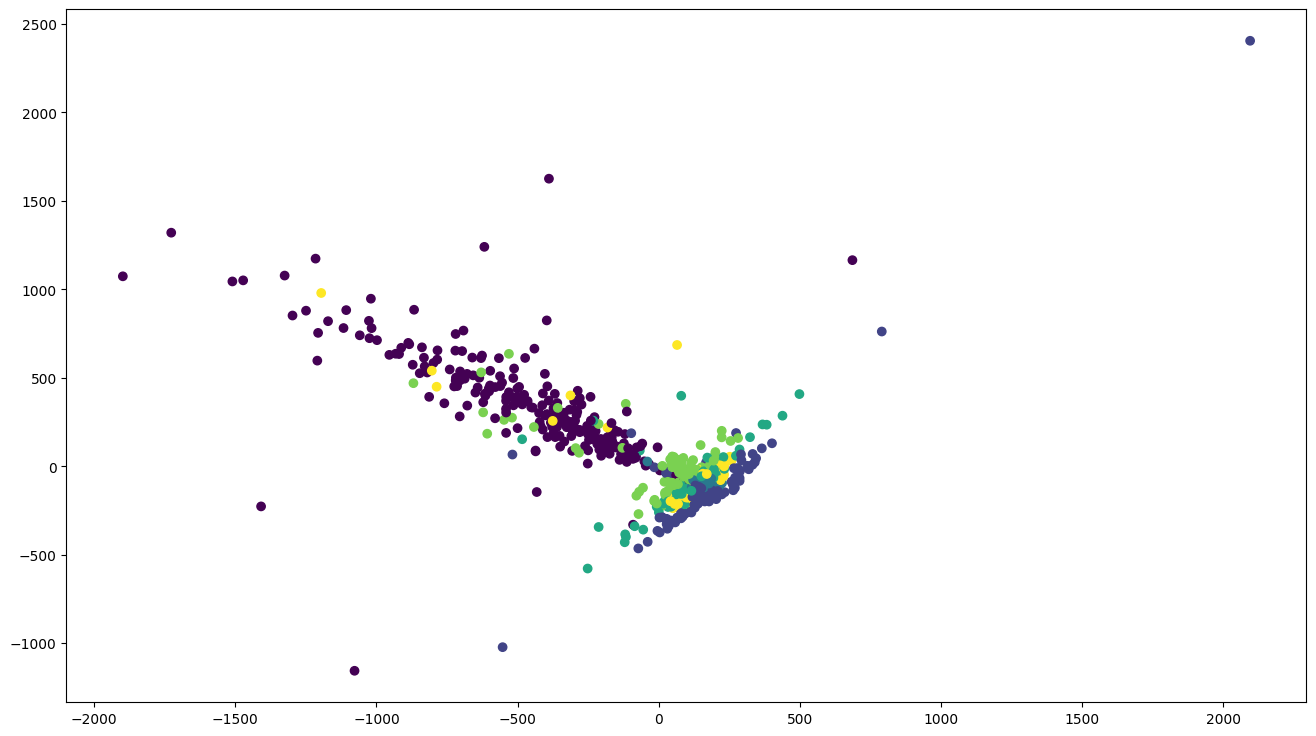

In [5]:
mds = MDS()
mds_raw = mds.fit_transform(X_raw)
plt.figure(figsize=(16, 9))
plt.scatter(x = mds_raw[:, 0], y = mds_raw[:, 1], c=y_raw)
plt.show()

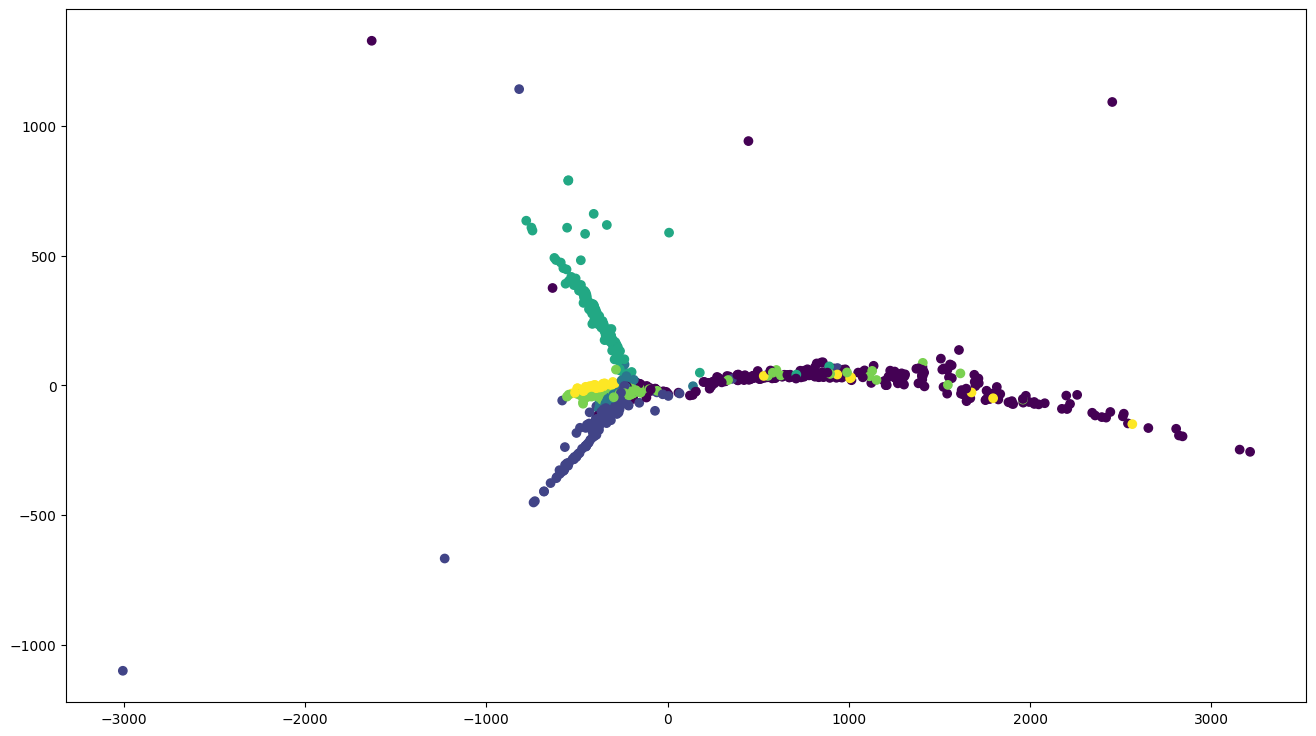

In [6]:
isomap = Isomap(neighbors_algorithm='kd_tree')
iso_raw = isomap.fit_transform(X_raw)
plt.figure(figsize=(16, 9))
plt.scatter(x = iso_raw[:, 0], y = iso_raw[:, 1], c=y_raw)
plt.show()

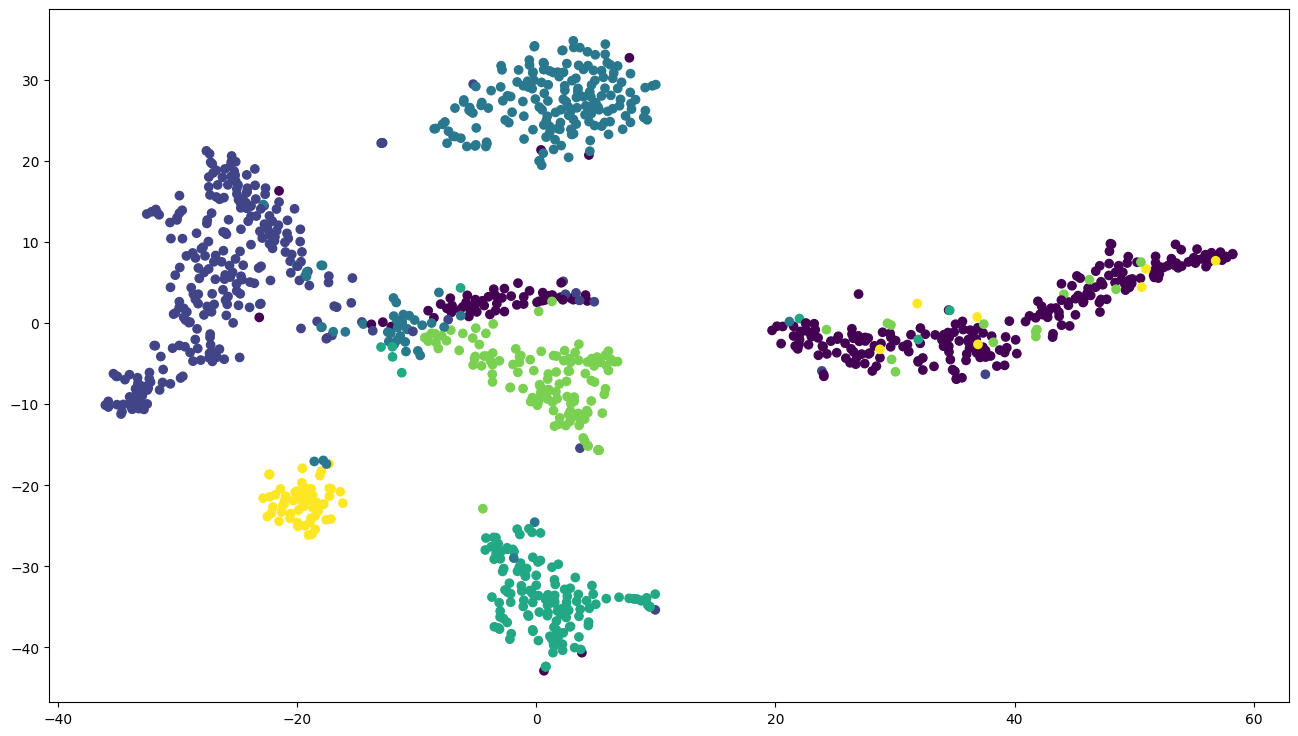

In [7]:
tsne = TSNE()
tsne_raw = tsne.fit_transform(X_raw)
plt.figure(figsize=(16, 9))
plt.scatter(x = tsne_raw[:, 0], y = tsne_raw[:, 1], c=y_raw)
plt.show()

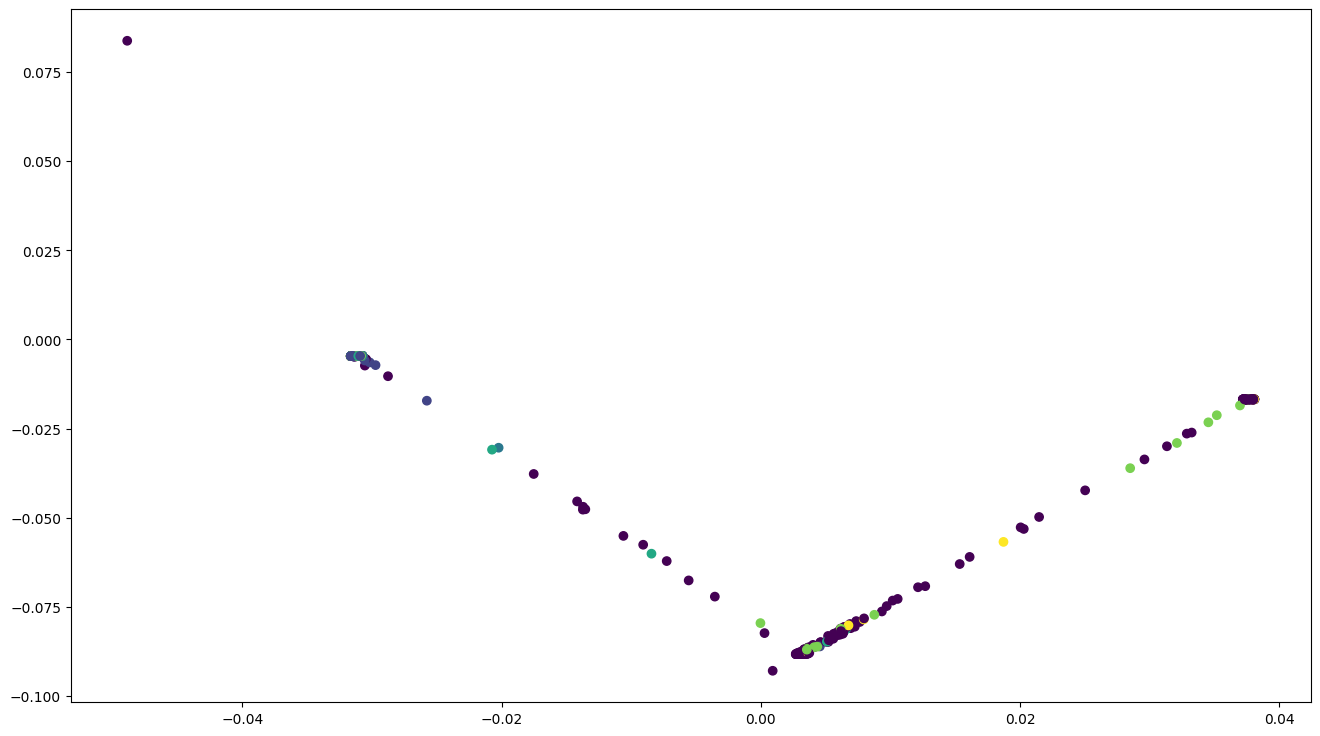

In [8]:
lle = LocallyLinearEmbedding()
lle_raw = lle.fit_transform(X_raw)
plt.figure(figsize=(16, 9))
plt.scatter(x = lle_raw[:, 0], y = lle_raw[:, 1], c=y_raw)
plt.show()

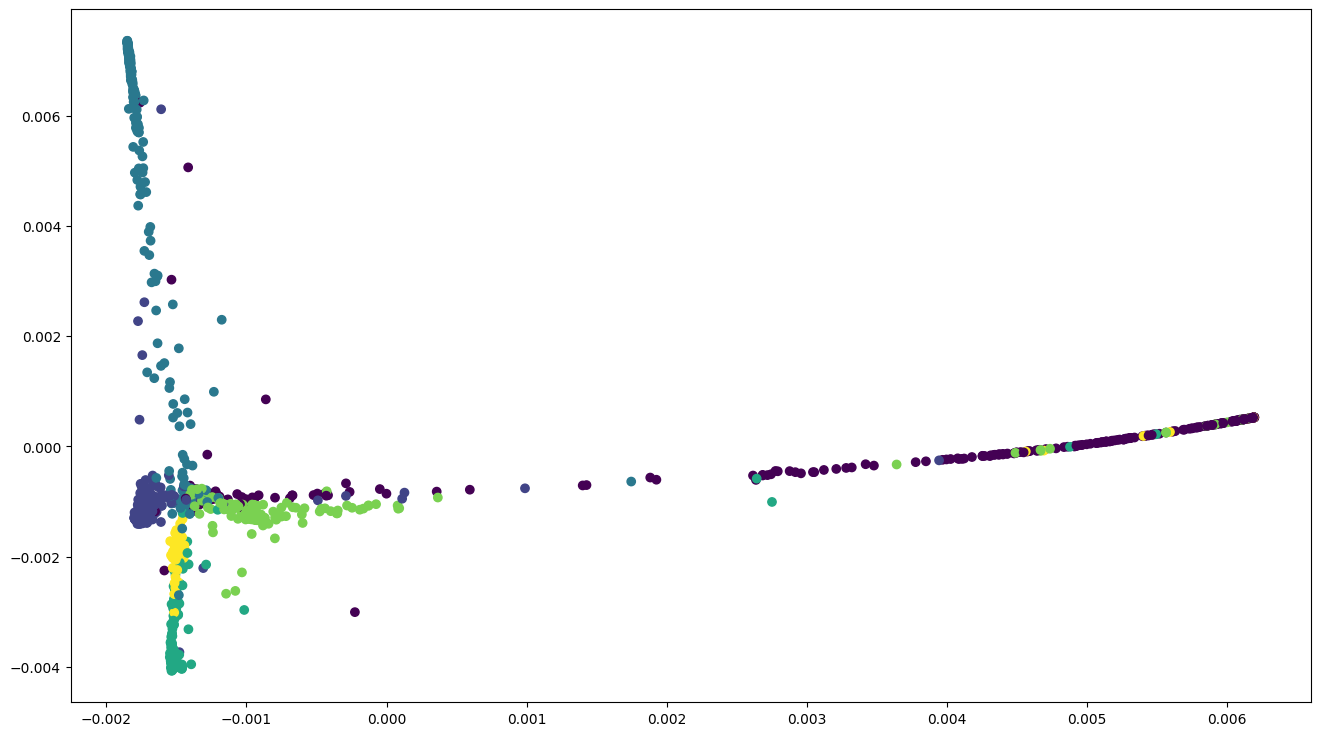

In [9]:
se = SpectralEmbedding()
se_raw = se.fit_transform(X_raw)
plt.figure(figsize=(16, 9))
plt.scatter(x = se_raw[:, 0], y = se_raw[:, 1], c=y_raw)
plt.show()

Here, we find that the tSNE method can vasualization the data clearly. Thus we use the method as a simple criterion of our clustering.

In [18]:
from sklearn.manifold import TSNE

model = TSNE()
pts_raw = model.fit_transform(X_raw)
pts_trans = model.fit_transform(X_trans)

In [26]:
def visulization(X: np.ndarray, labels: np.ndarray, title: str):

    plt.figure(figsize=(16, 9))
    plt.title(title)
    plt.scatter(X[:, 0], X[:, 1], c=labels)
    plt.show()

In [44]:
def showRaw():
    visulization(pts_raw, y_raw, "Real labels in raw dataset")
    
def showCLR():
    visulization(pts_trans, y_trans, "Real labels in CLR dataset")

## Section 2. Clustering and Comparison

### The comparison of original dataset

In [12]:
from sklearn.cluster import *

In [35]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X_raw)
y_kms_raw = kmeans.predict(X_raw)

kmeans.fit(X_trans)
y_kms_trans = kmeans.predict(X_trans)

/opt/homebrew/Caskroom/miniconda/base/envs/py3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniconda/base/envs/py3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


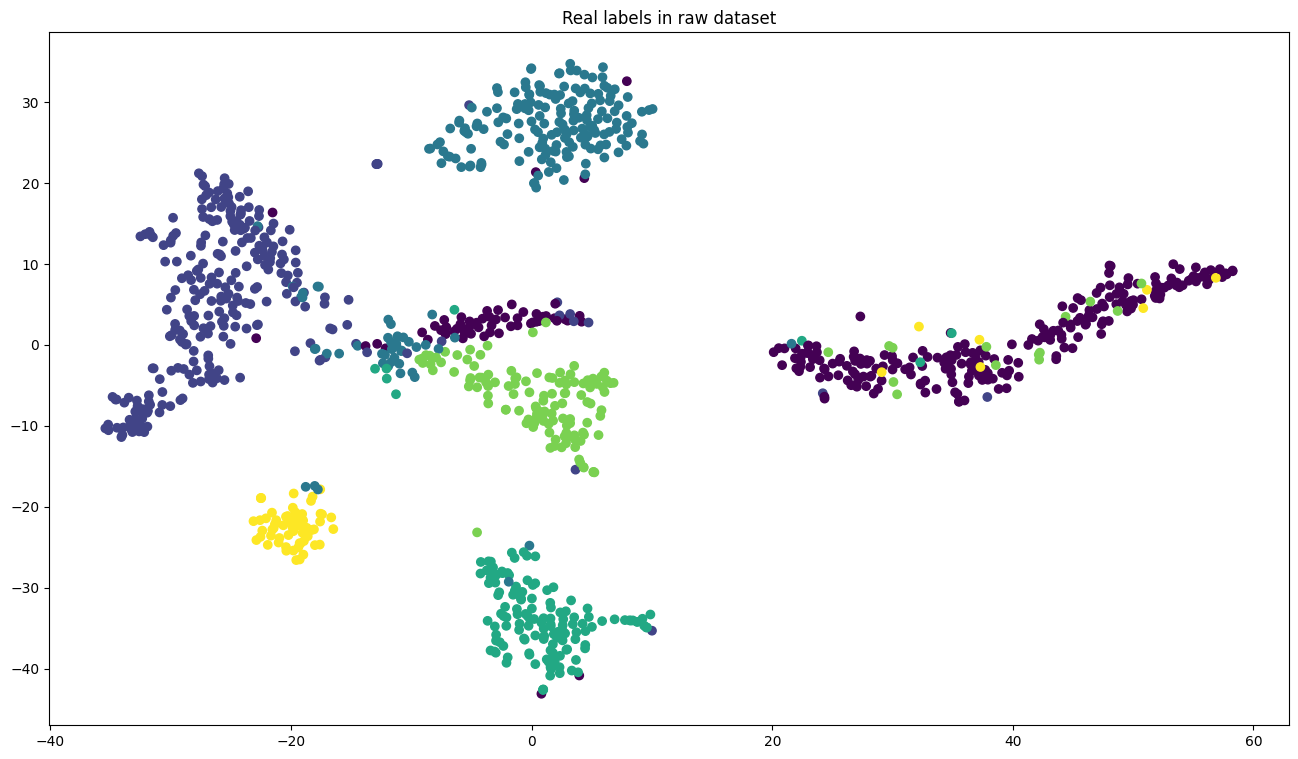

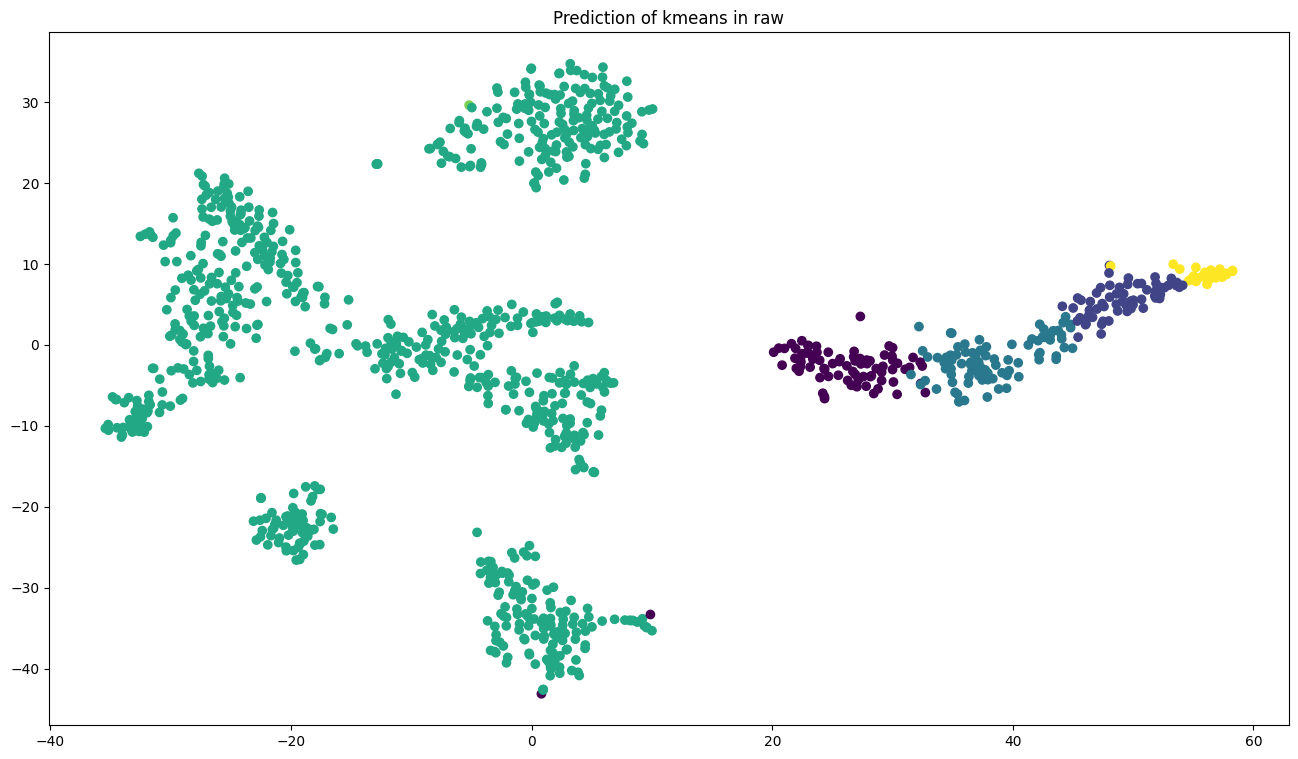

In [38]:
showRaw()
visulization(pts_raw, y_kms_raw, "Prediction of kmeans in raw")

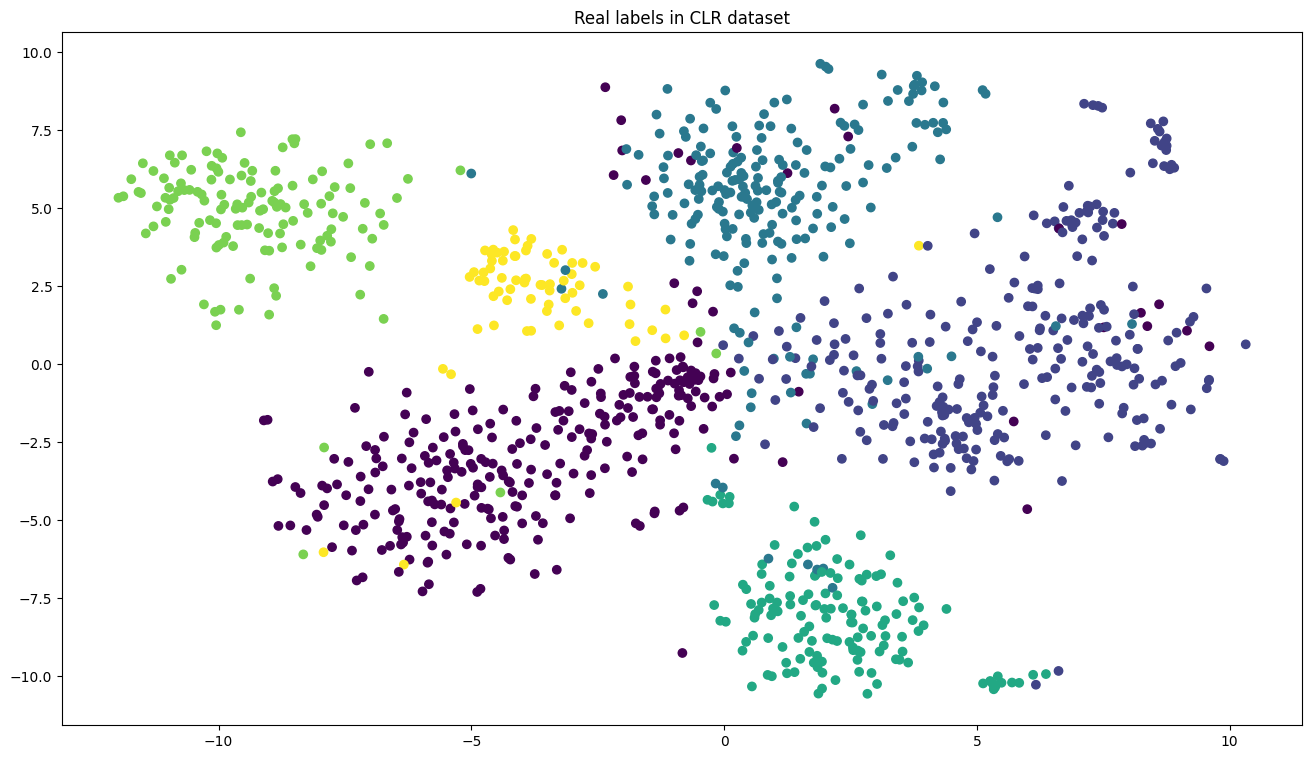

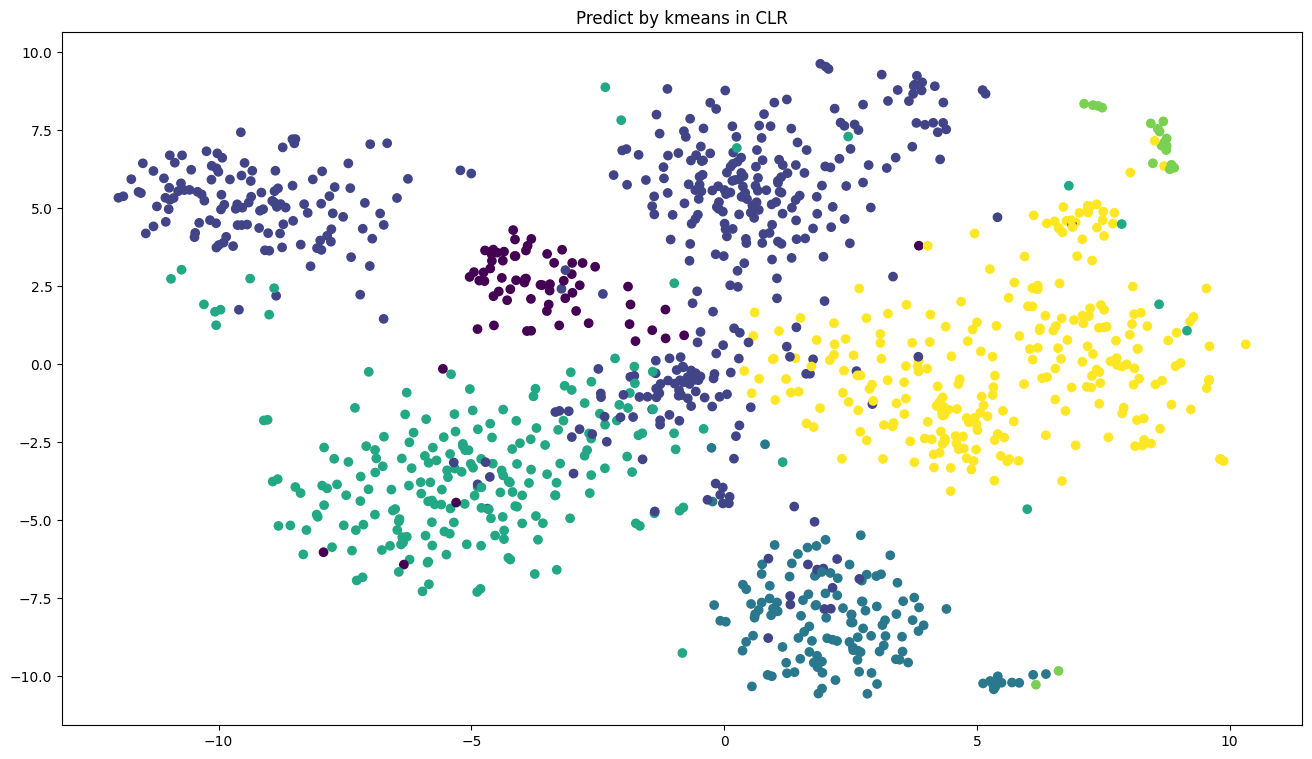

In [39]:
showCLR()
visulization(pts_trans, y_kms_trans, "Predict by kmeans in CLR")

In [40]:
from sklearn.tree import *

In [41]:
model = AgglomerativeClustering(n_clusters=6)

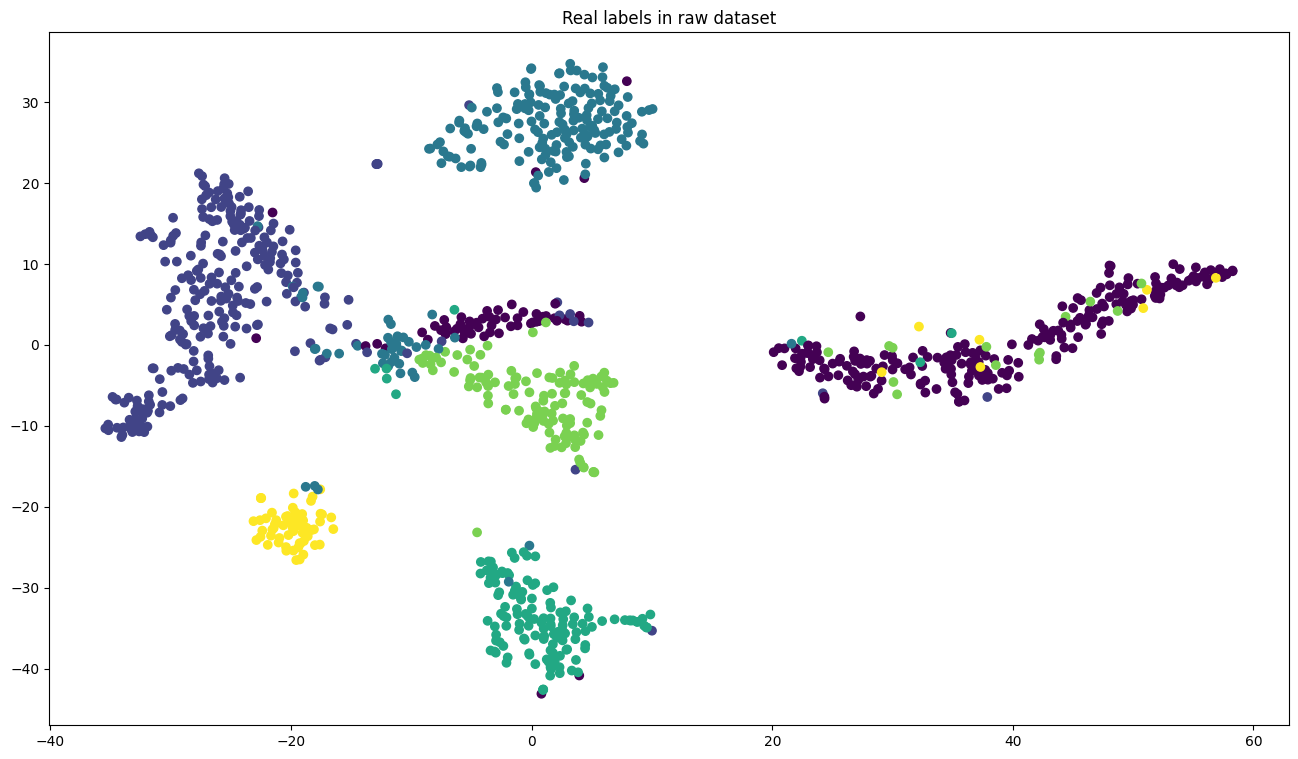

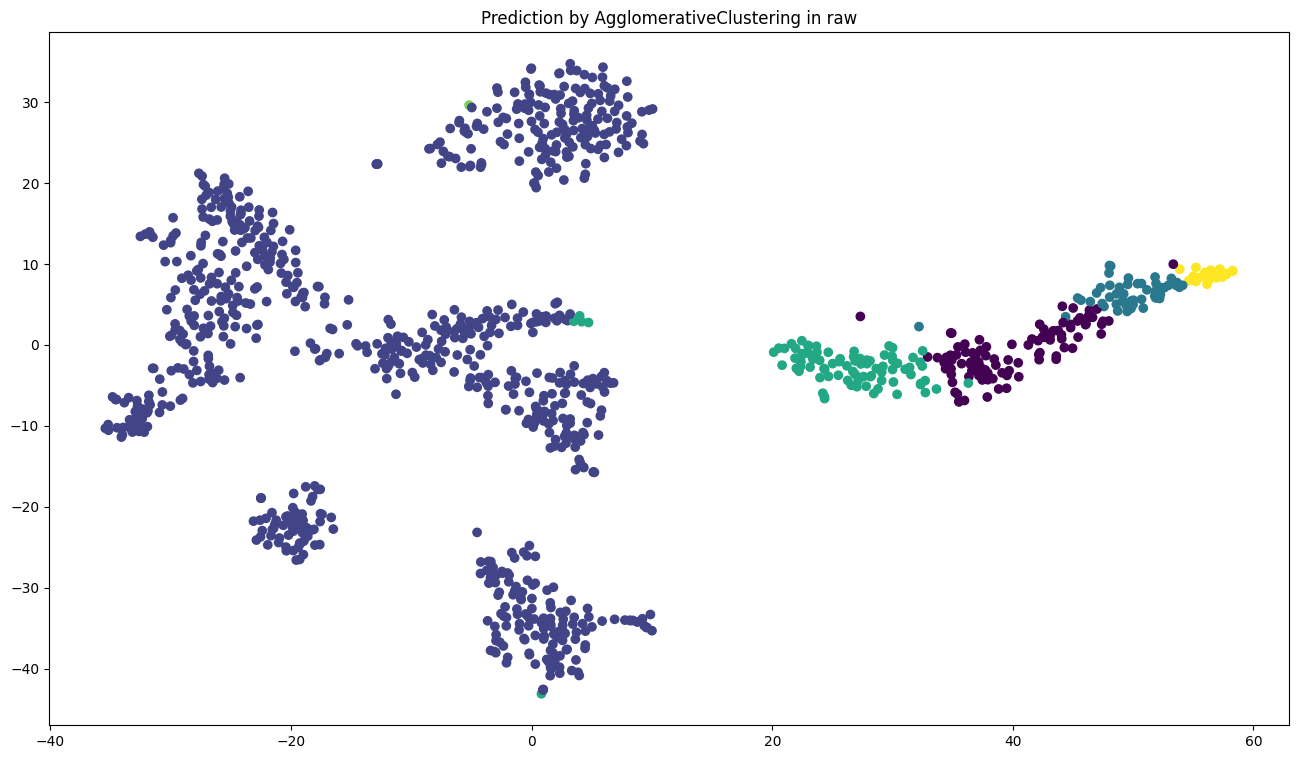

In [43]:
showRaw()
visulization(pts_raw, model.fit_predict(X_raw), "Prediction by AgglomerativeClustering in raw")

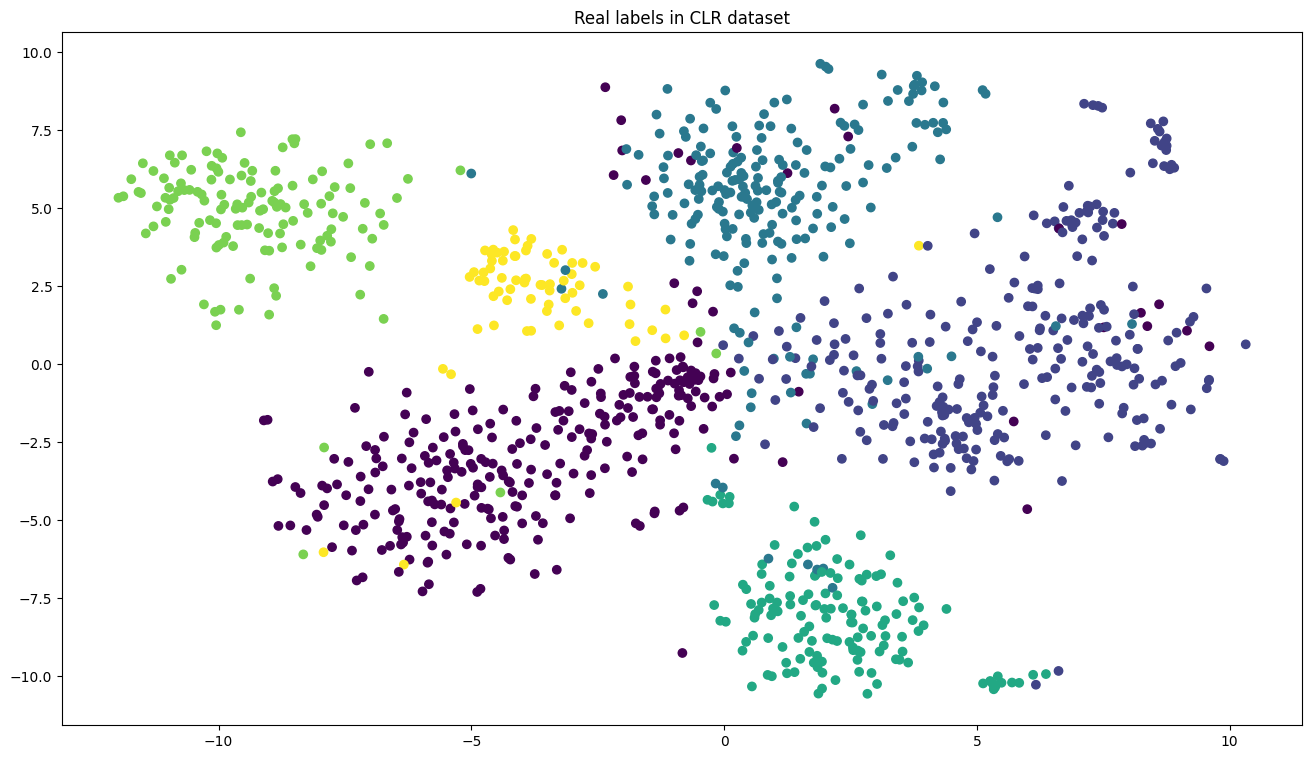

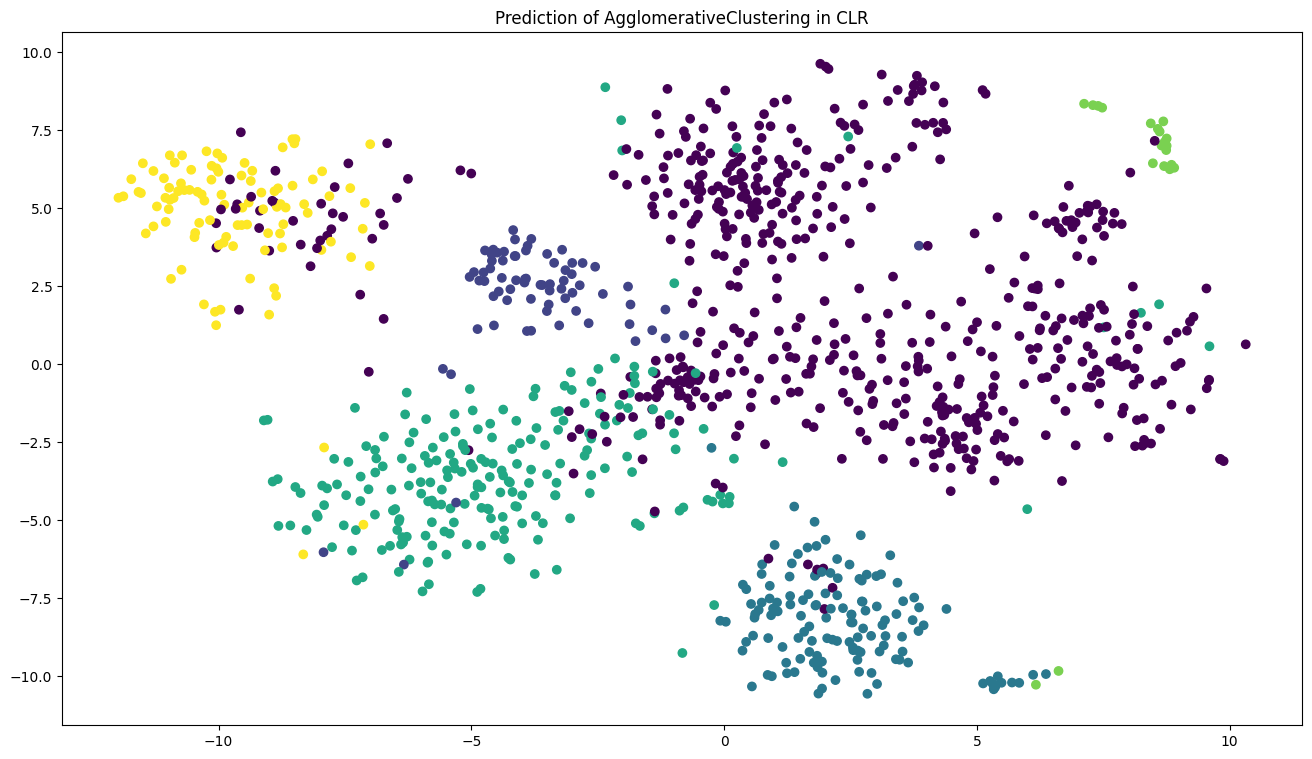

In [45]:
showCLR()
visulization(pts_trans, model.fit_predict(X_trans), "Prediction of AgglomerativeClustering in CLR")

In [66]:
models = [
    AgglomerativeClustering(n_clusters=6), 
    Birch(n_clusters=6),
    KMeans(n_clusters=6),
    BisectingKMeans(n_clusters=6),
    MiniBatchKMeans(n_clusters=6)
]

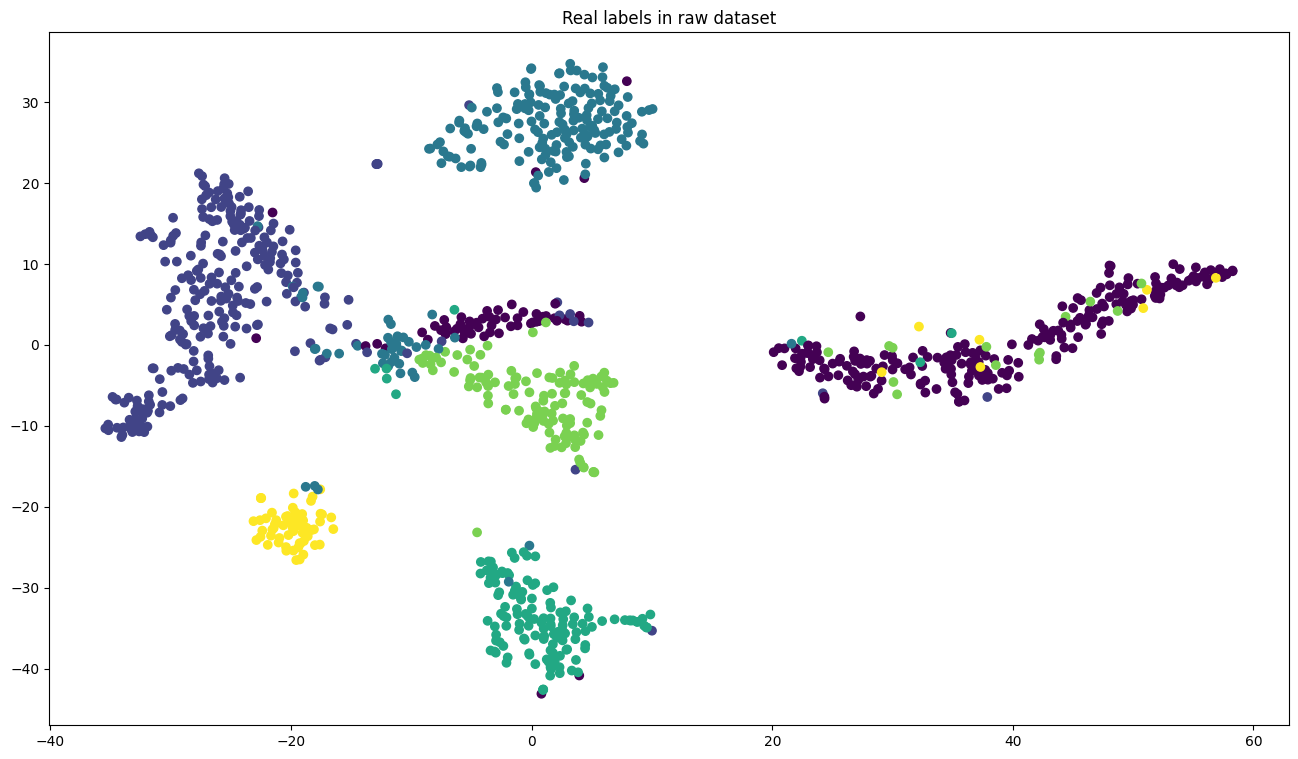

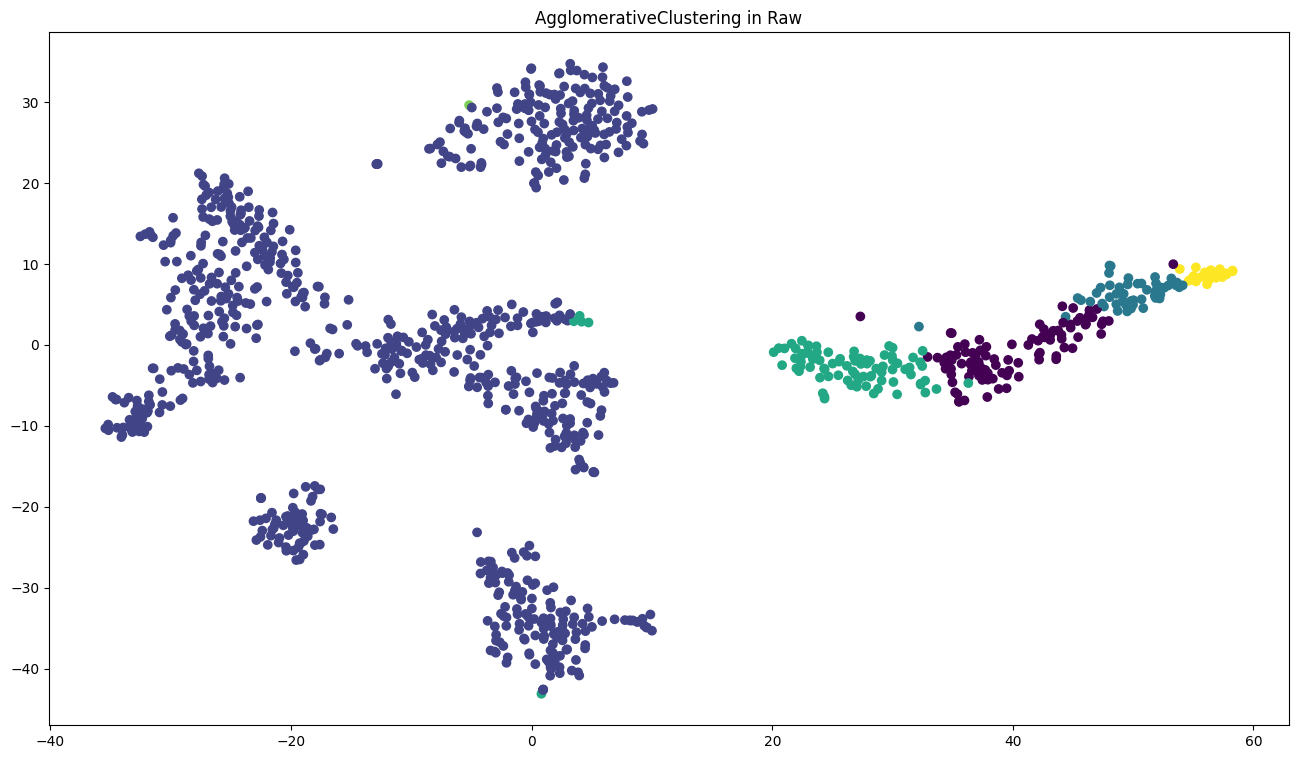

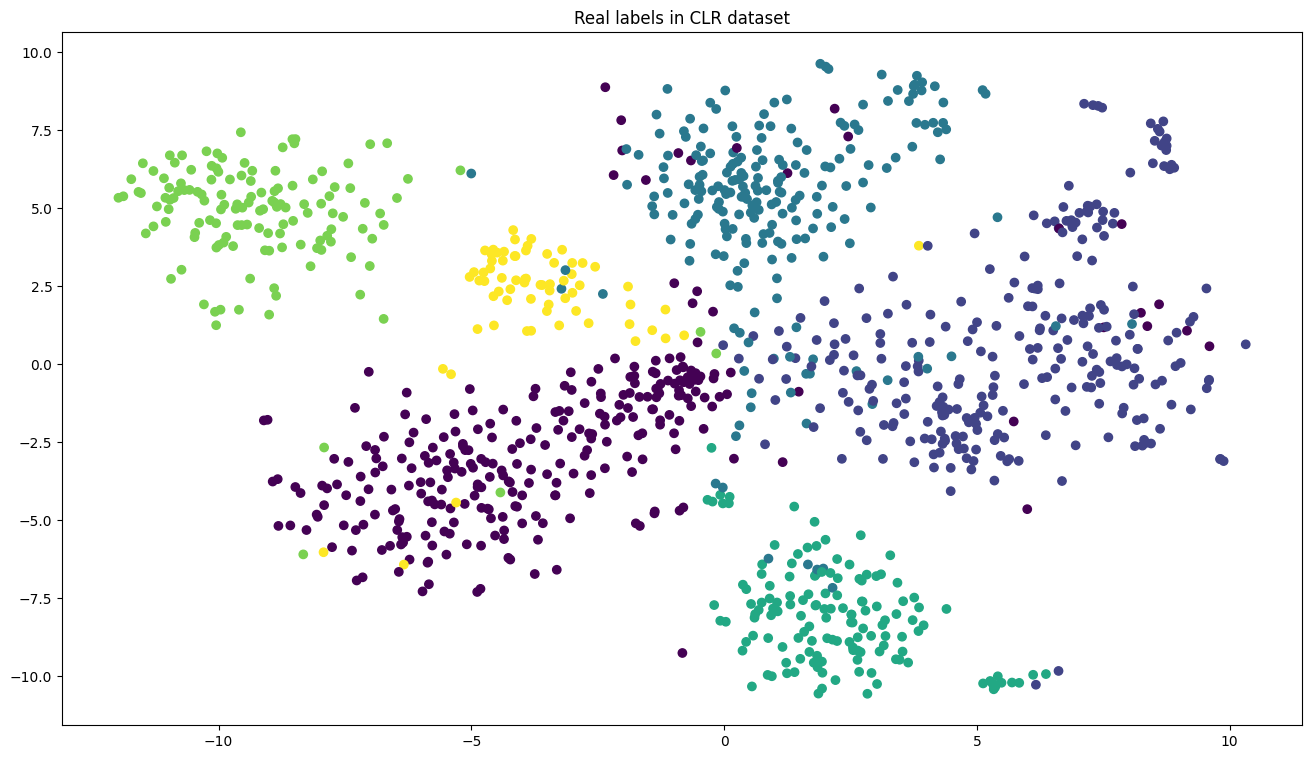

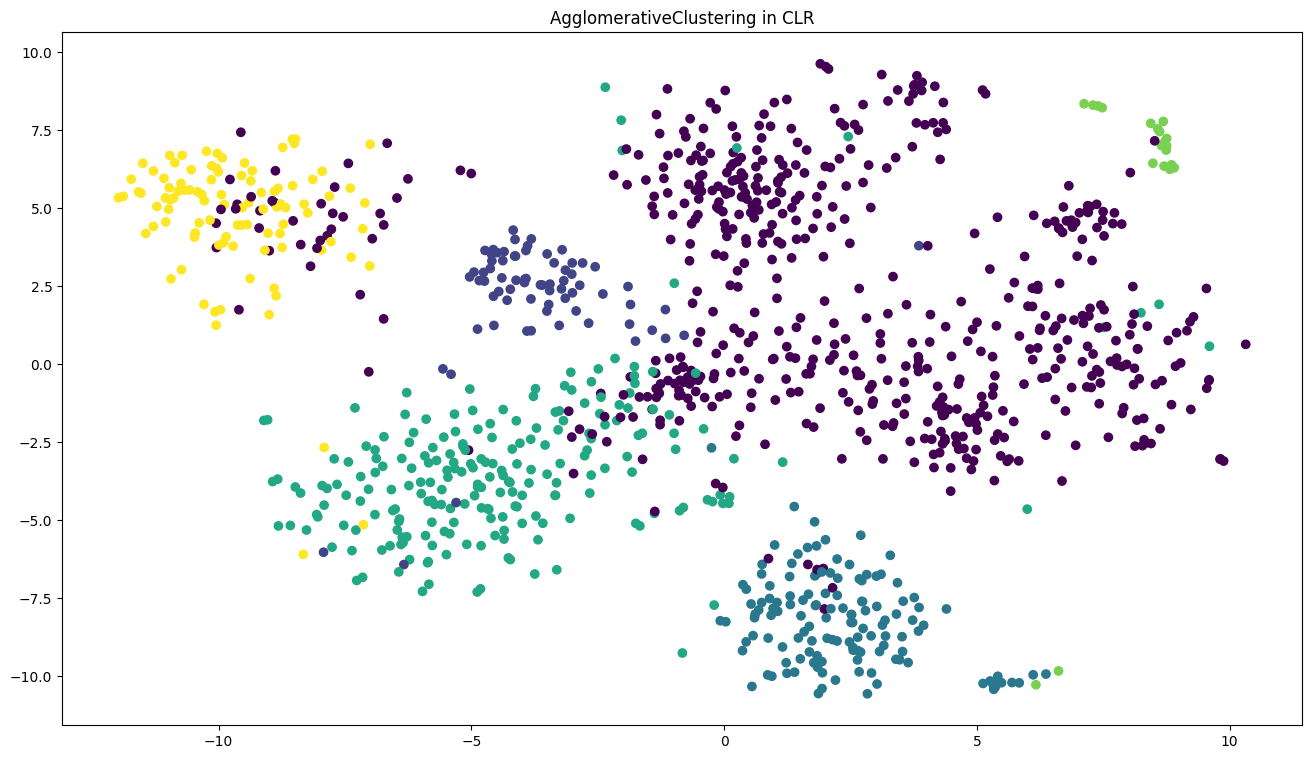

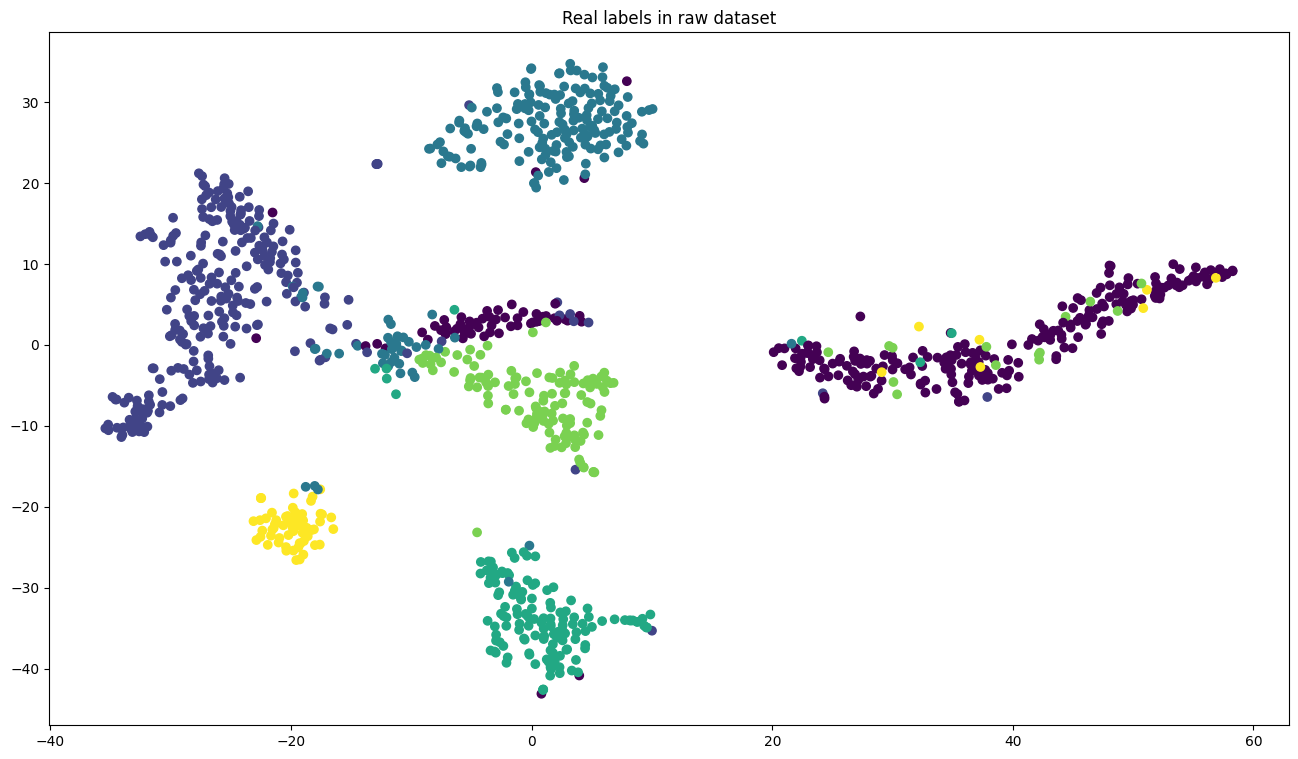

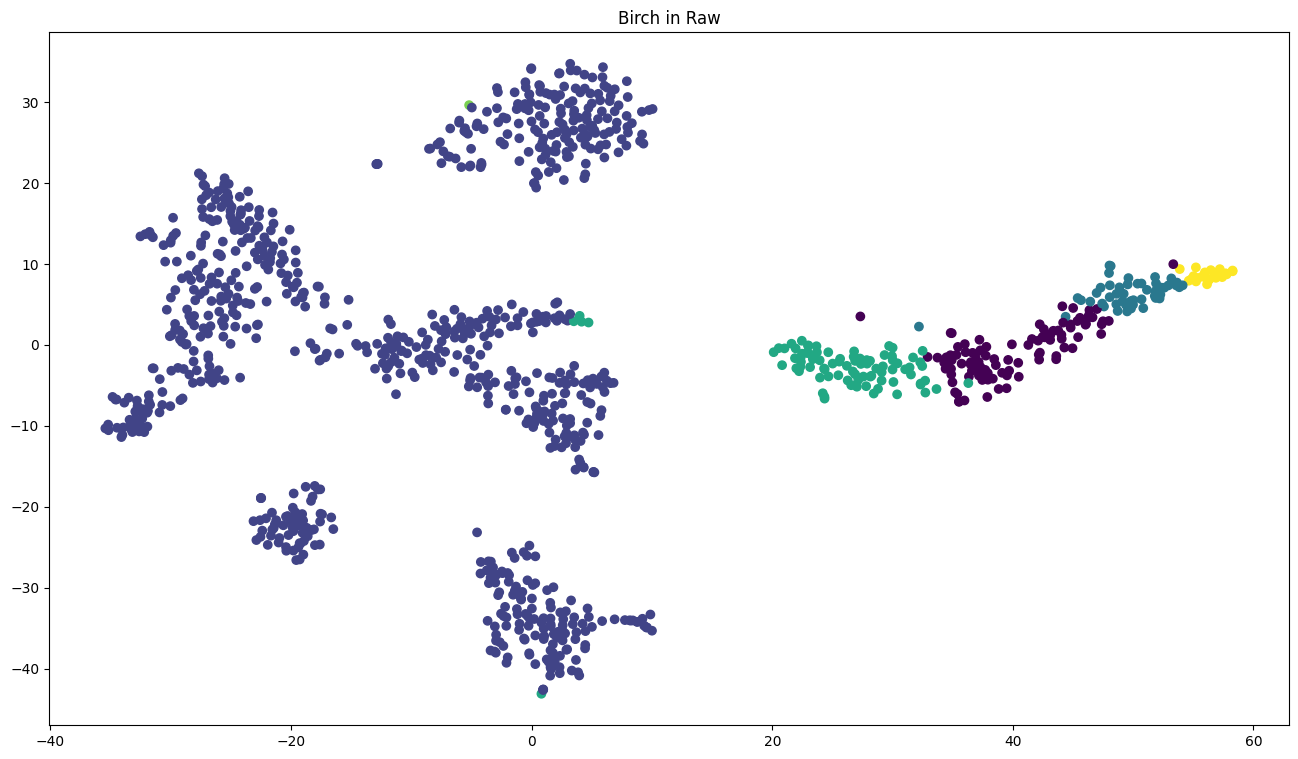

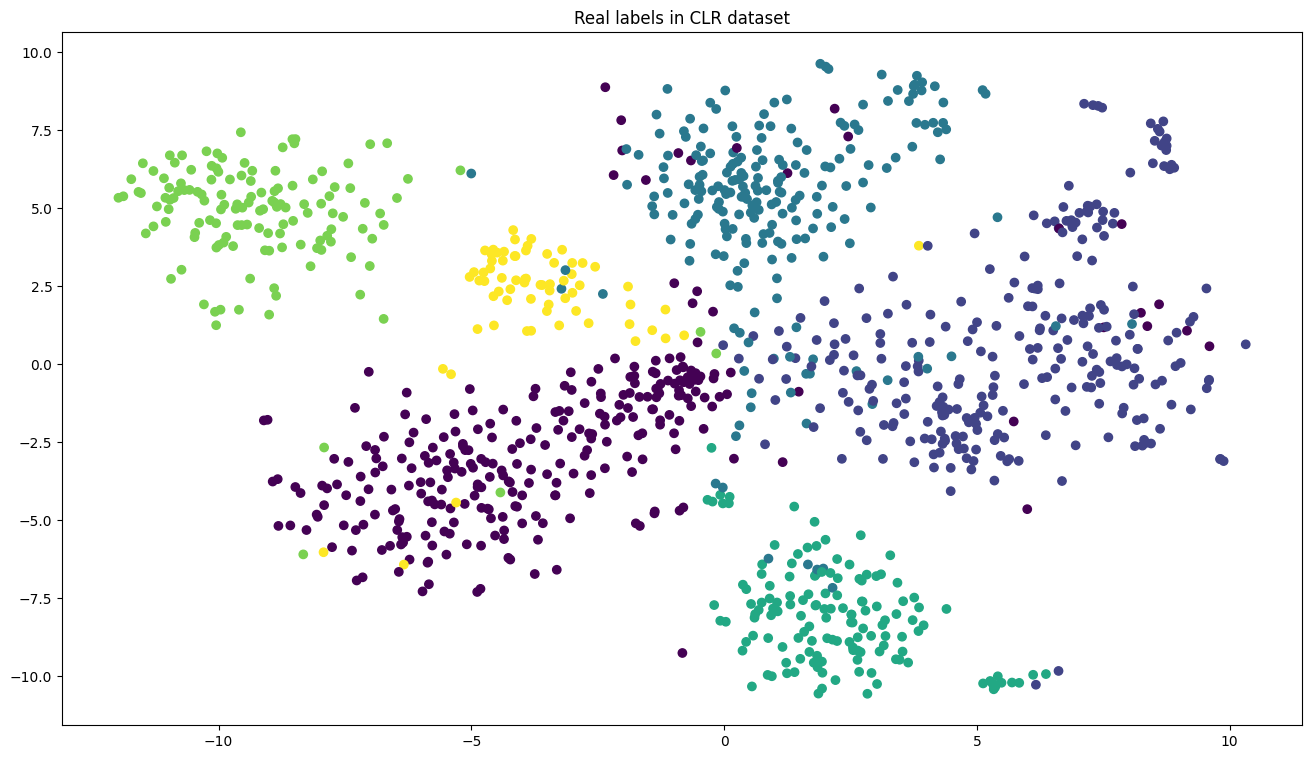

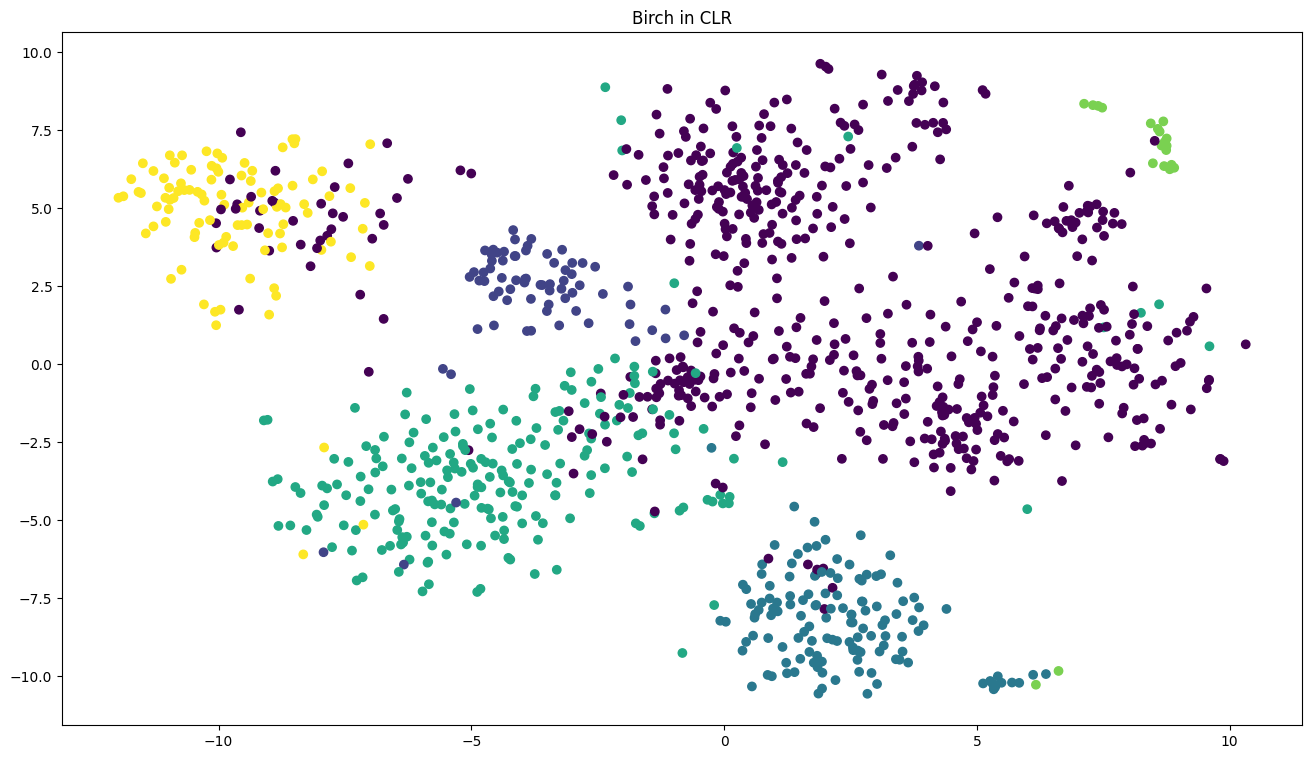

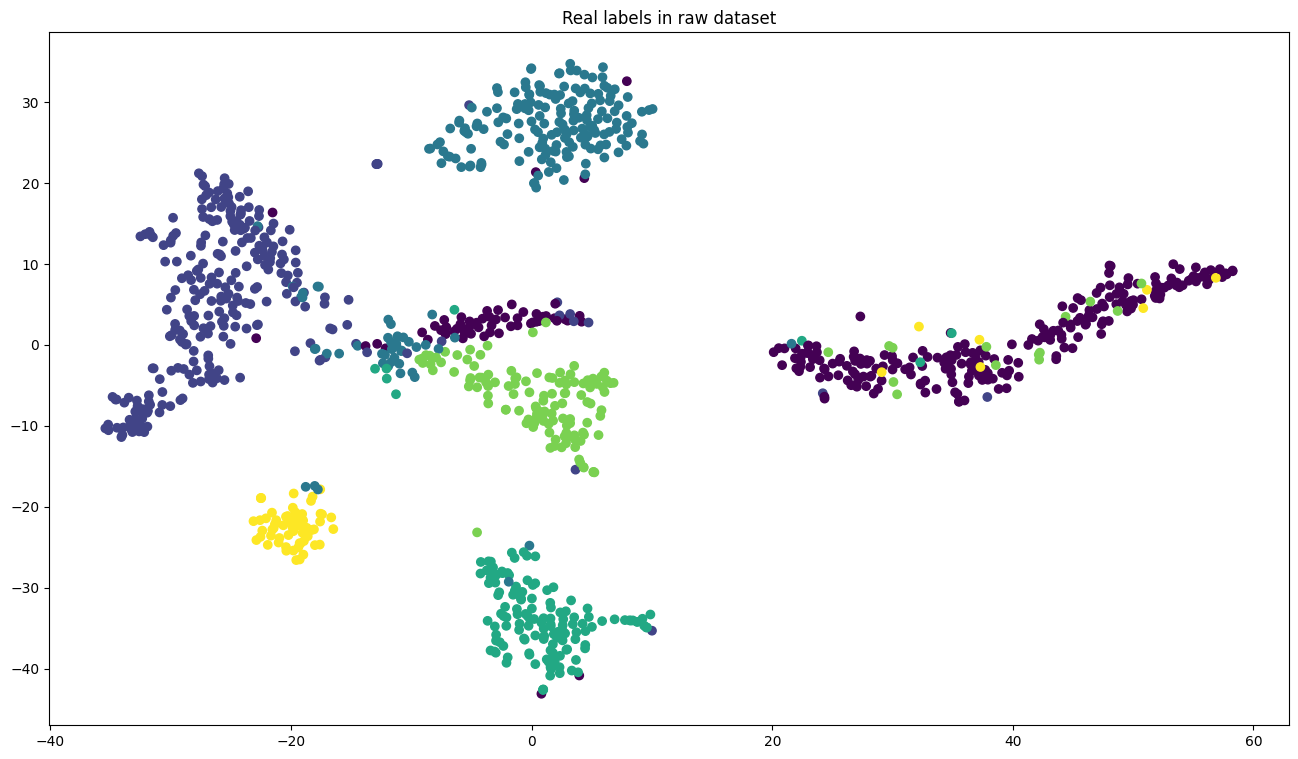

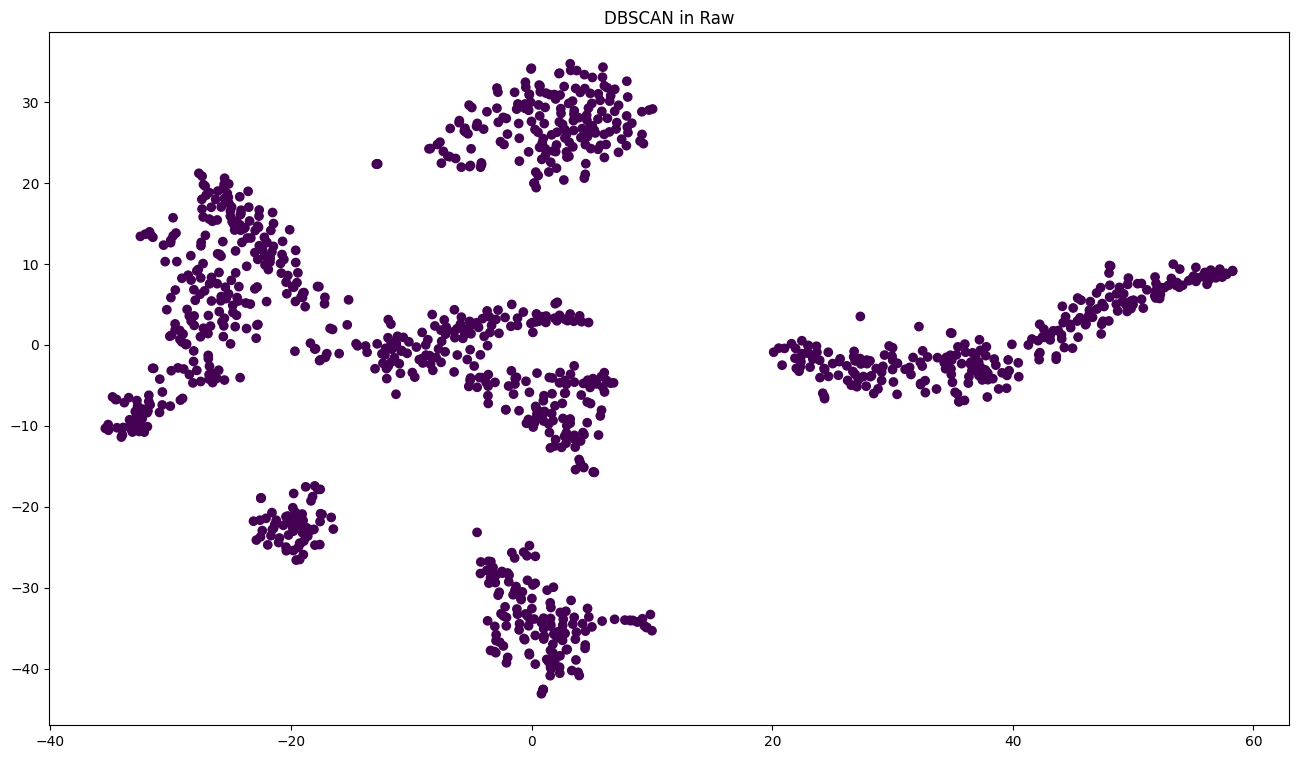

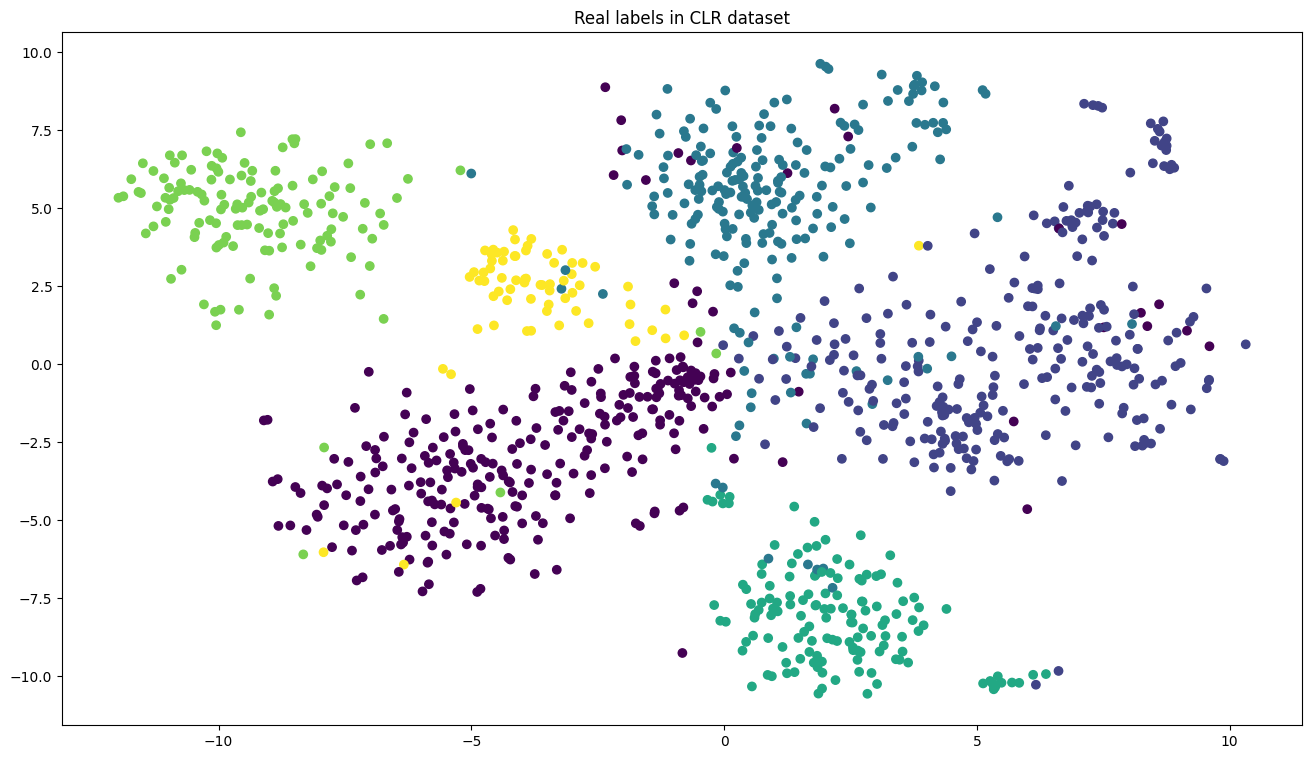

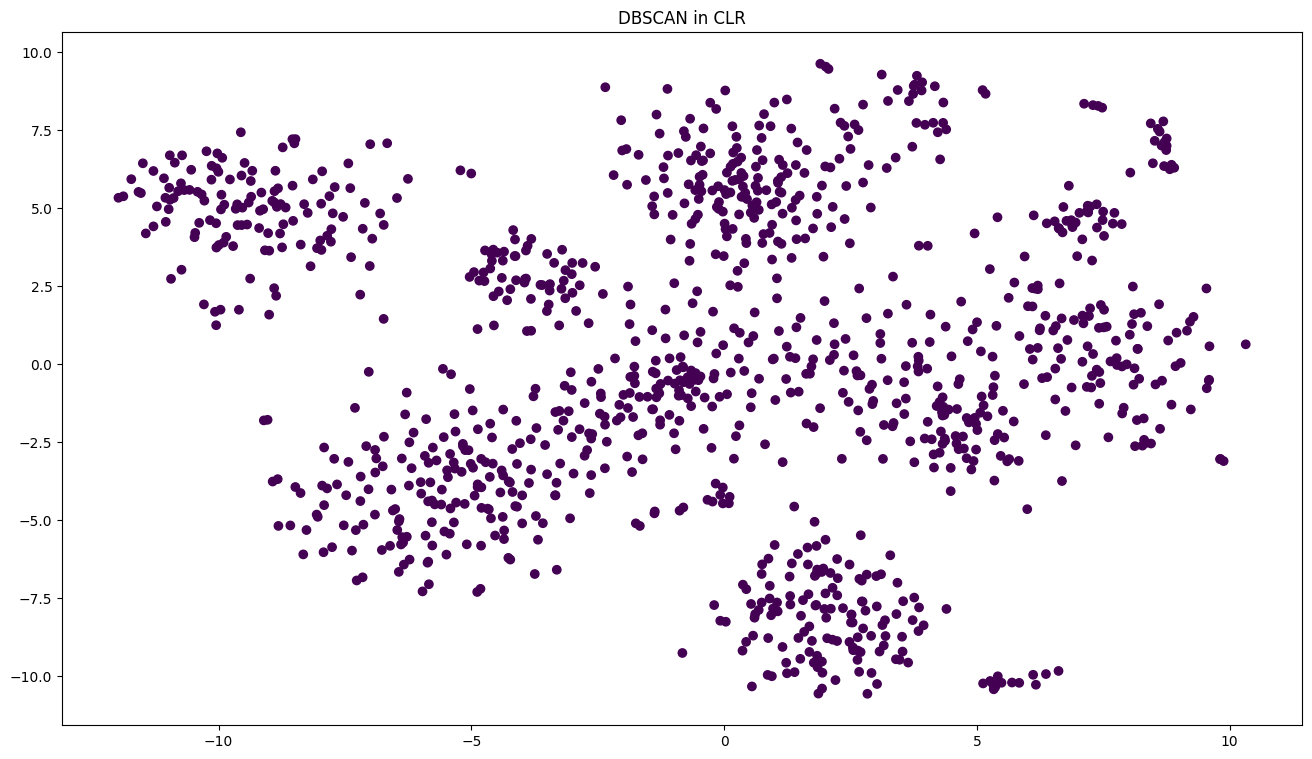

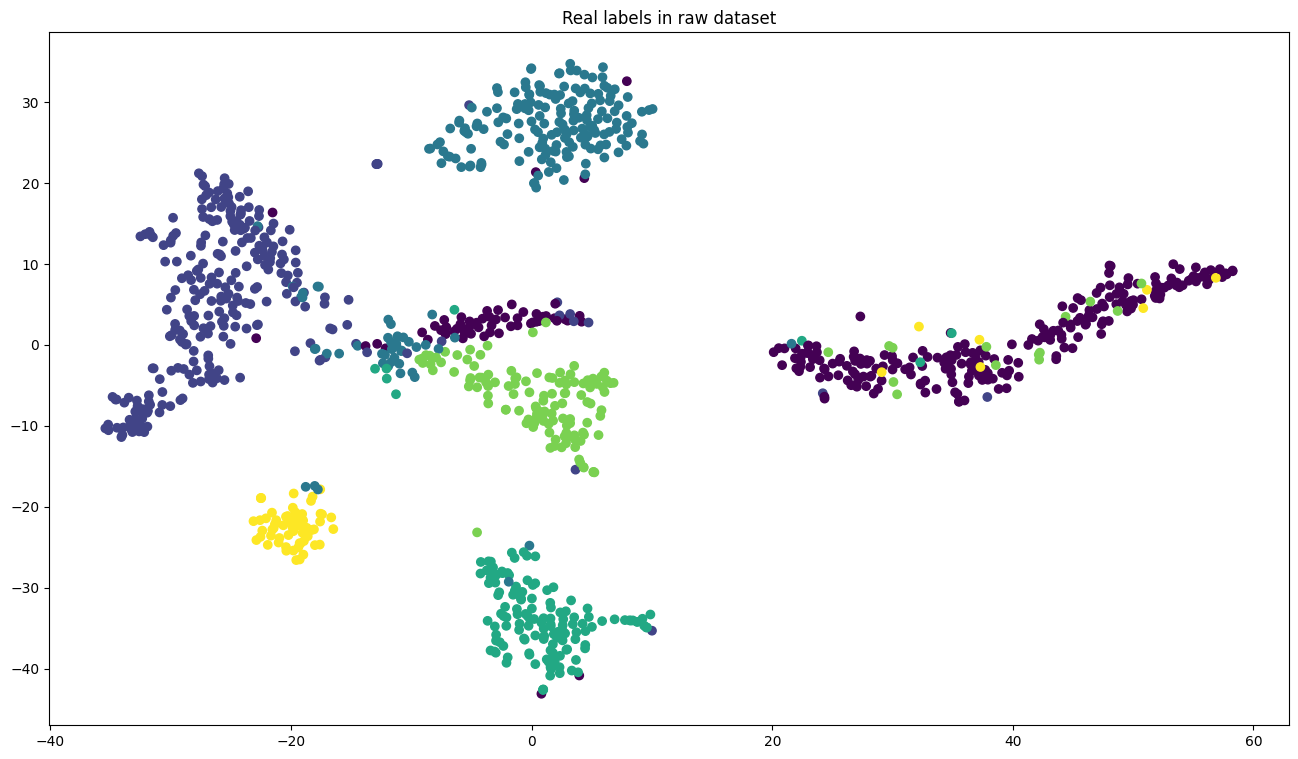

/opt/homebrew/Caskroom/miniconda/base/envs/py3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


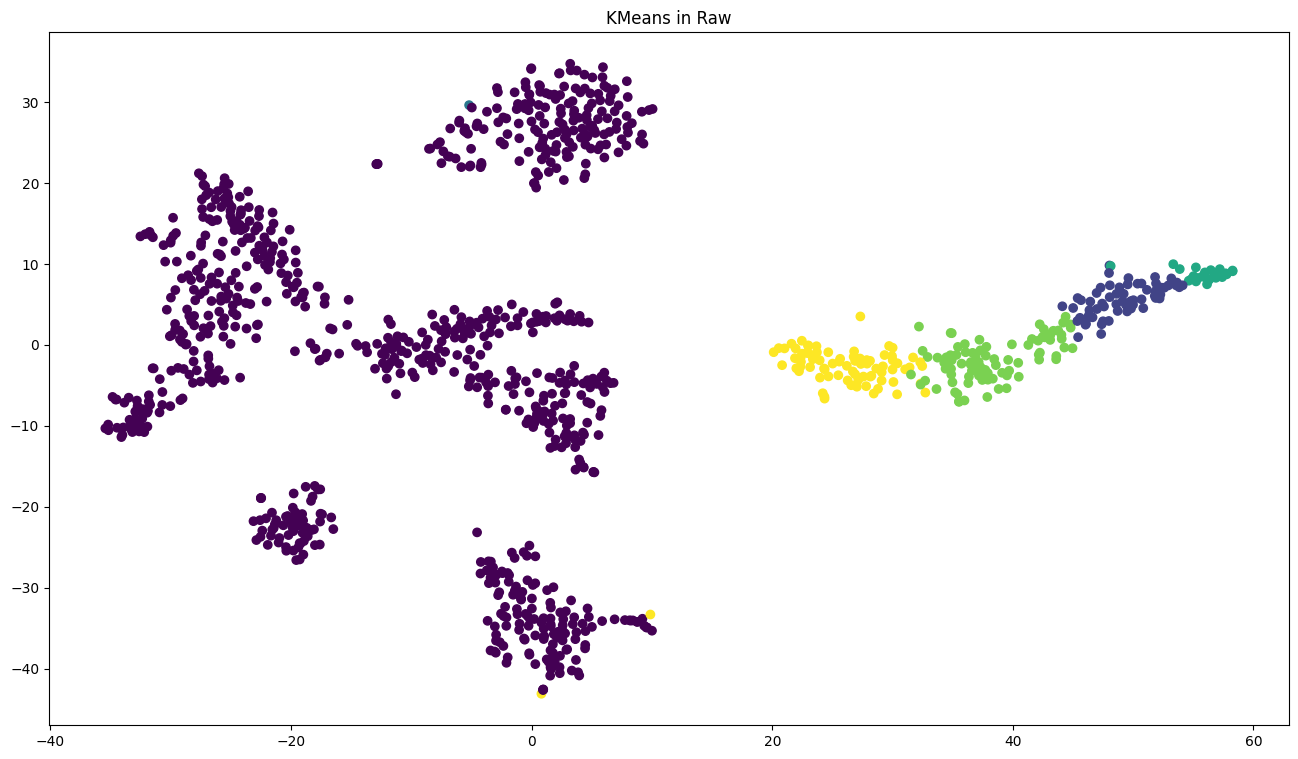

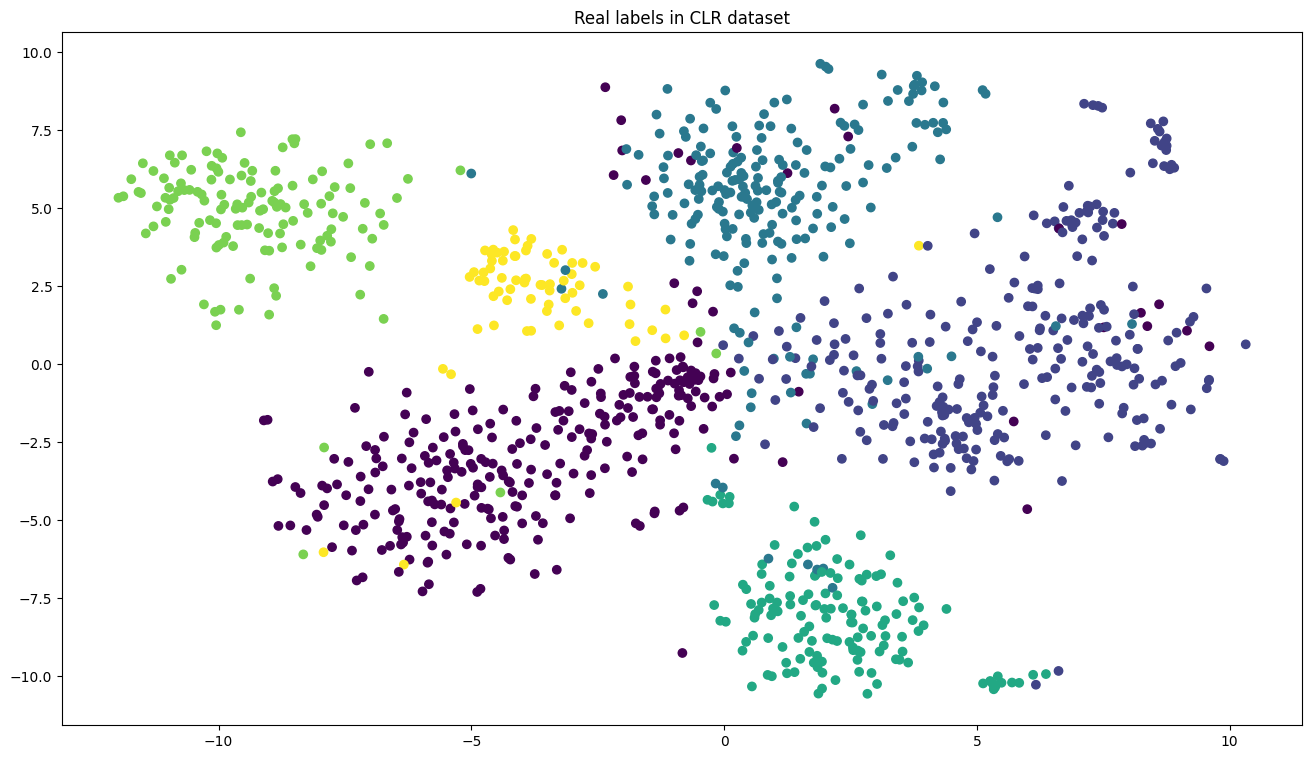

/opt/homebrew/Caskroom/miniconda/base/envs/py3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


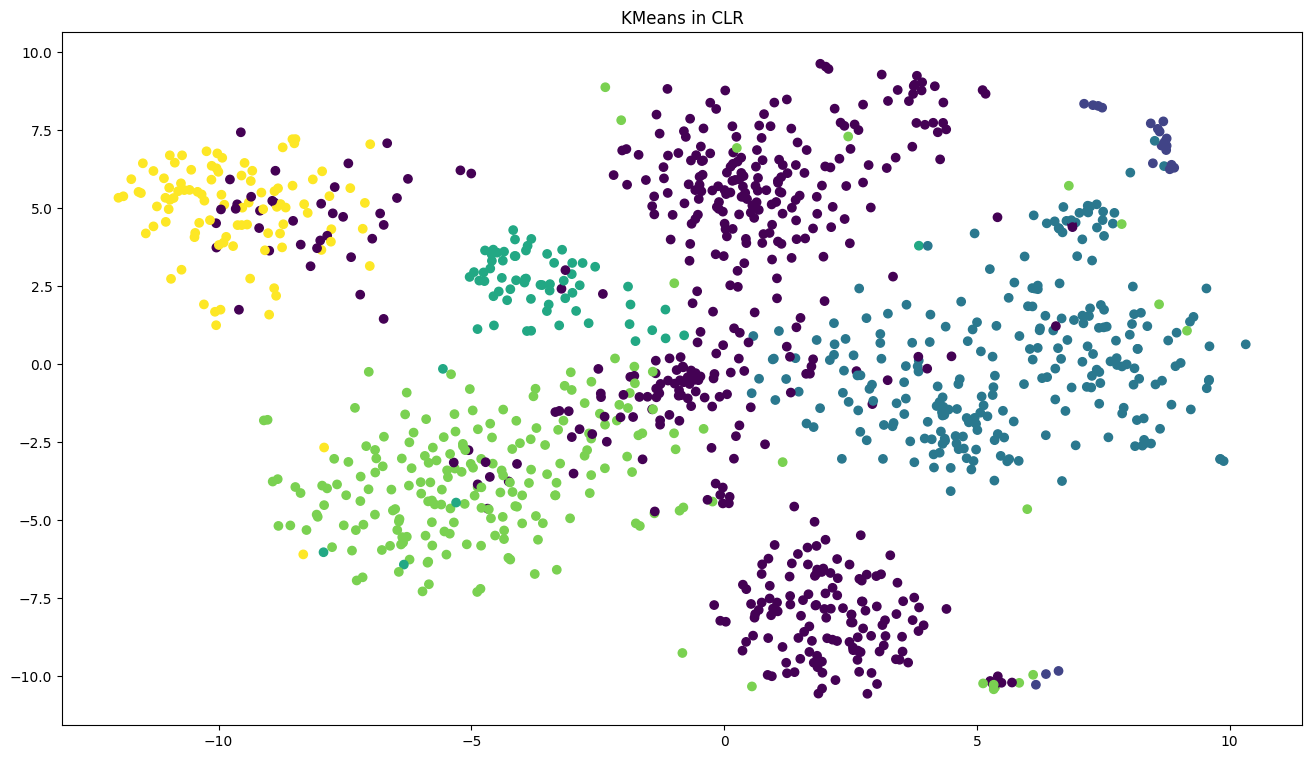

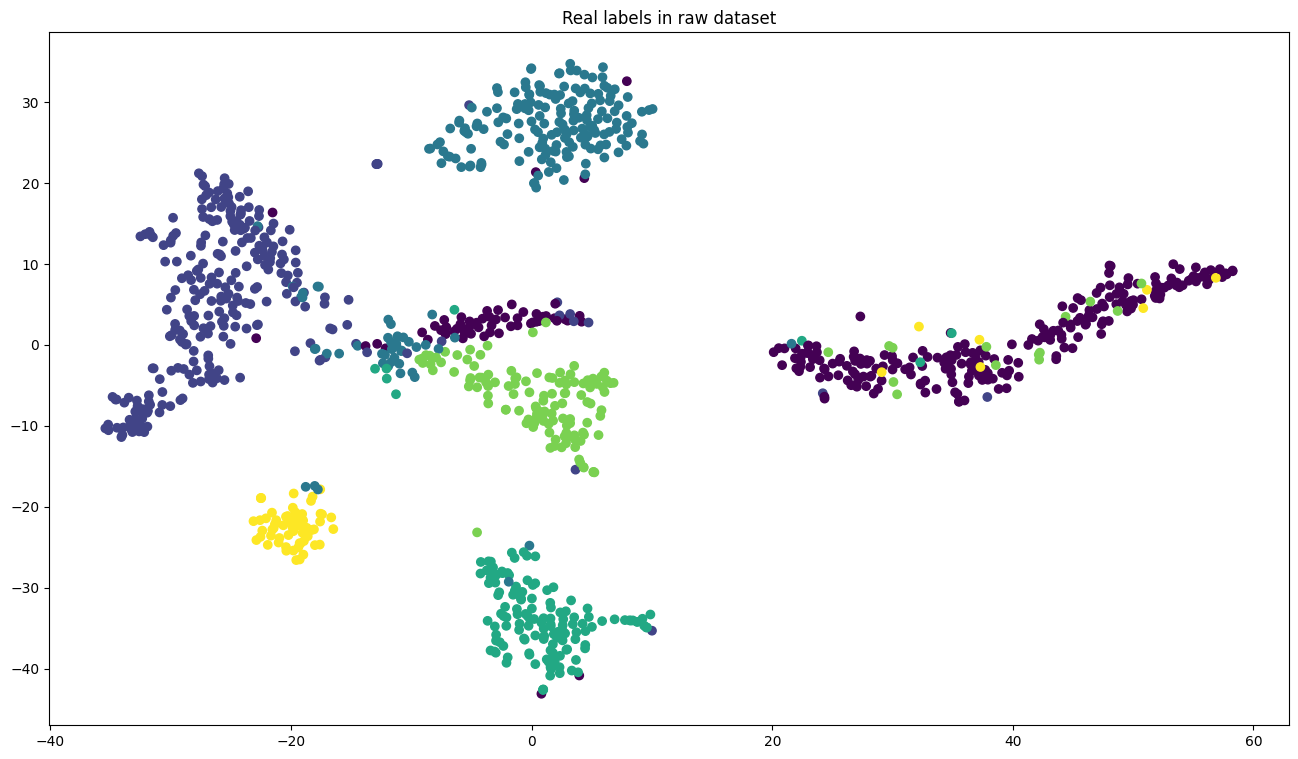

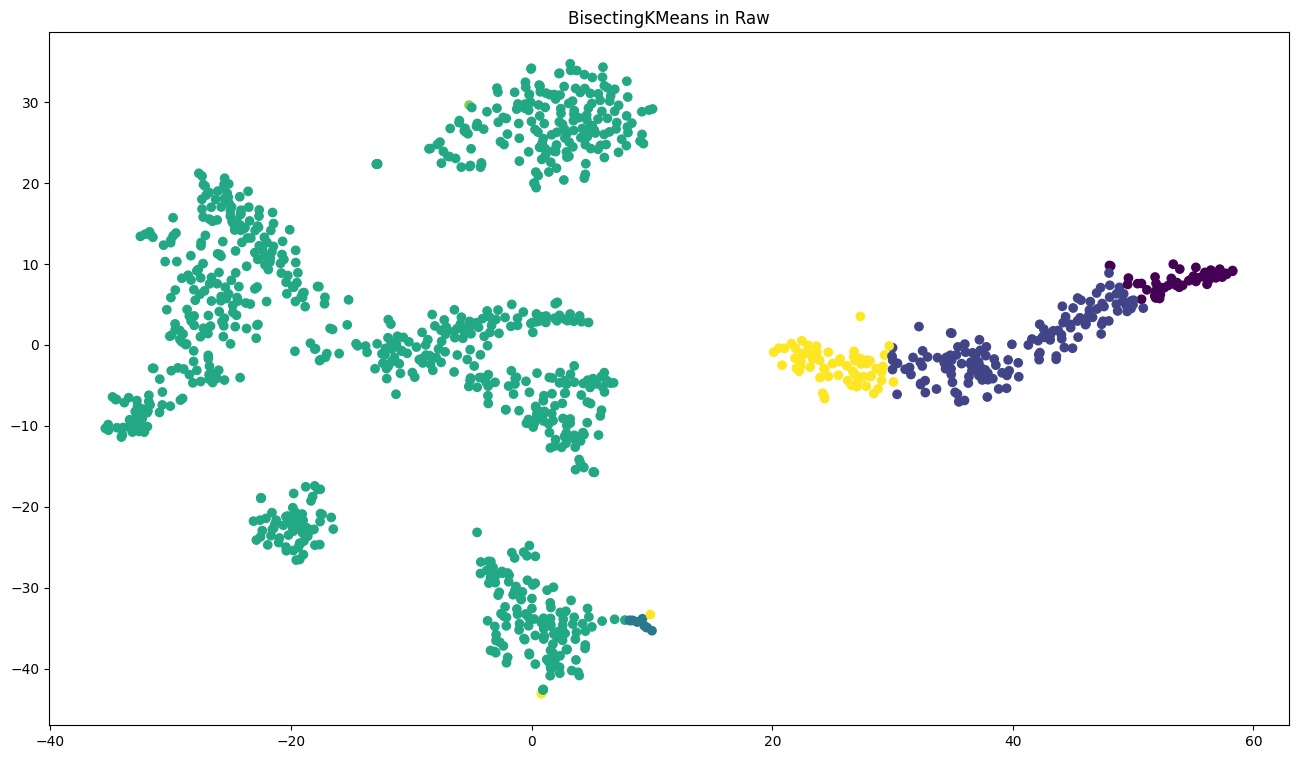

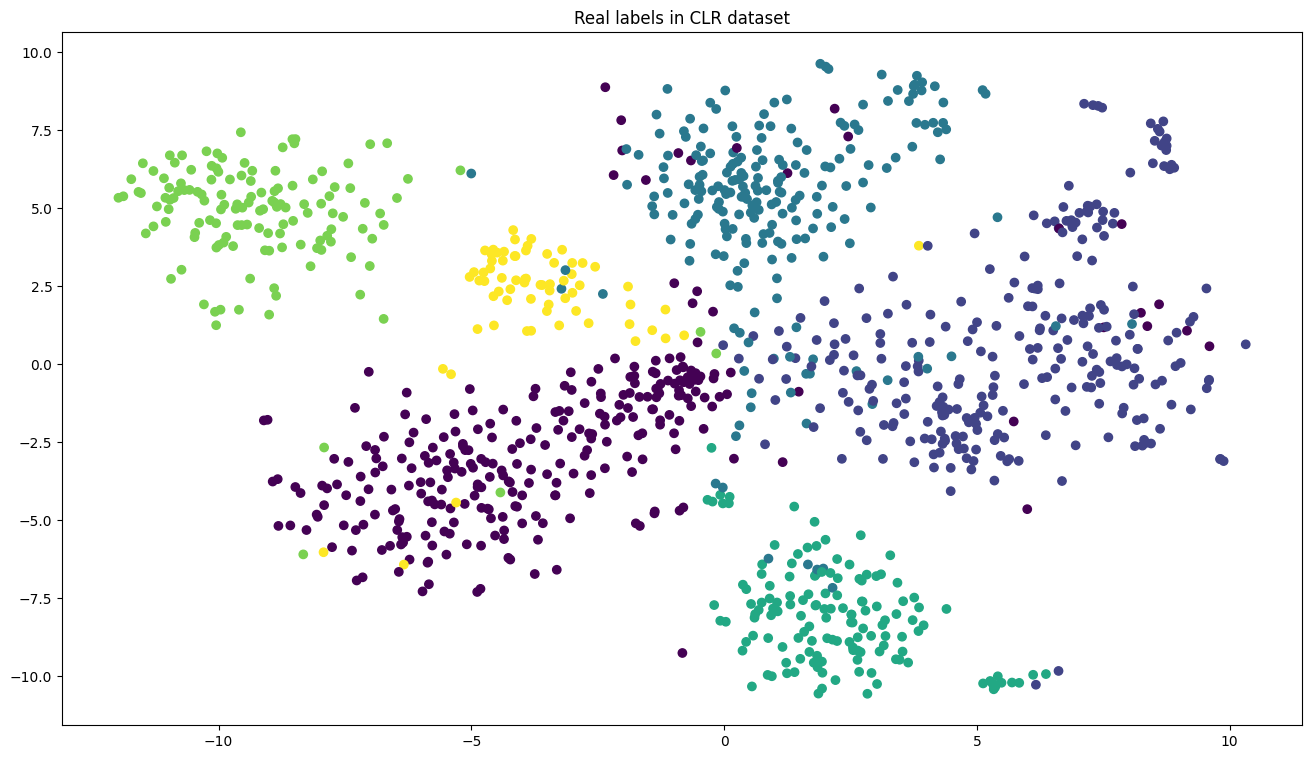

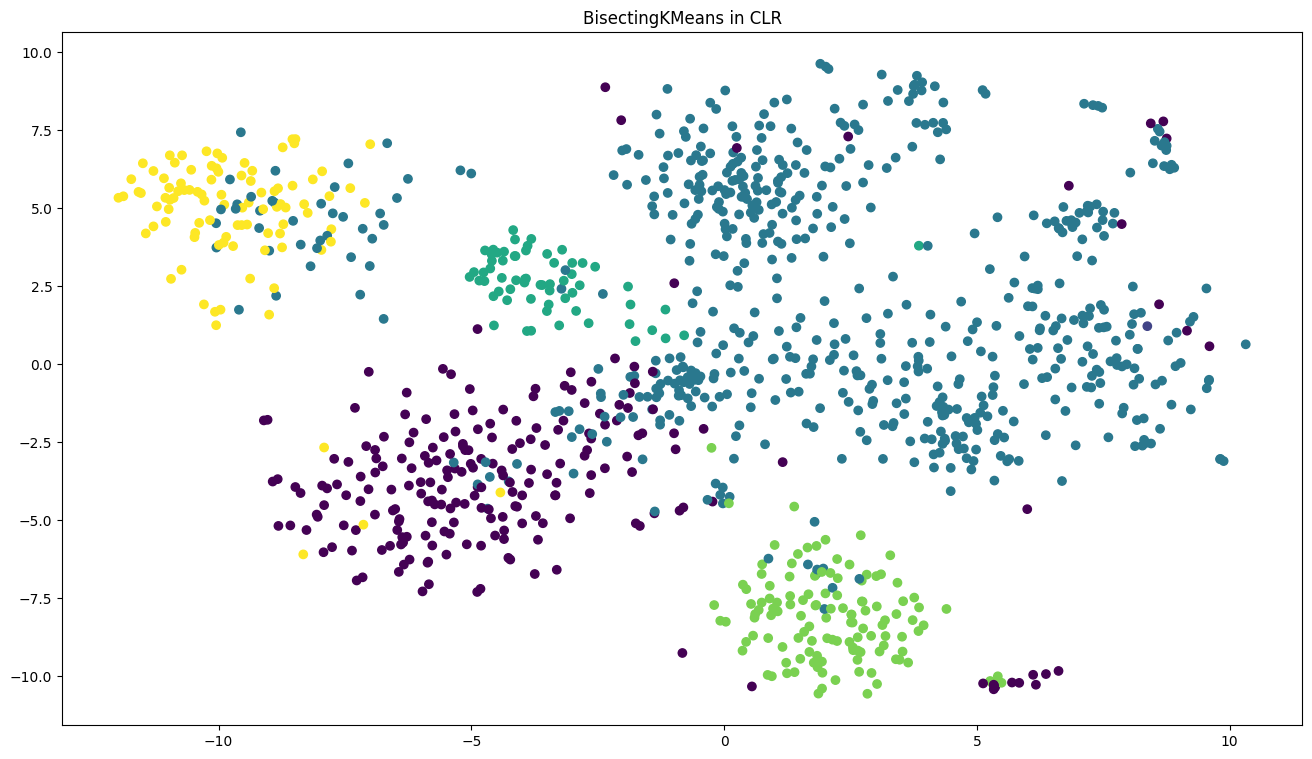

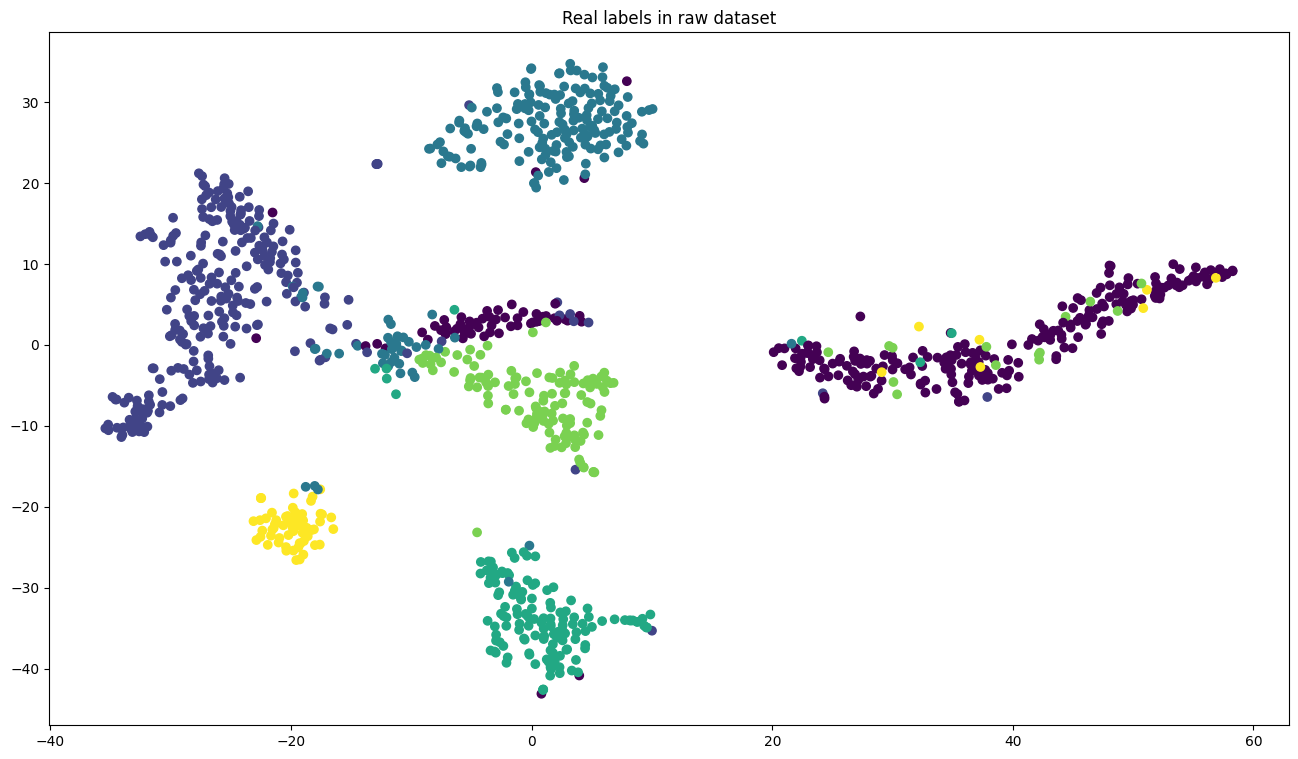

/opt/homebrew/Caskroom/miniconda/base/envs/py3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


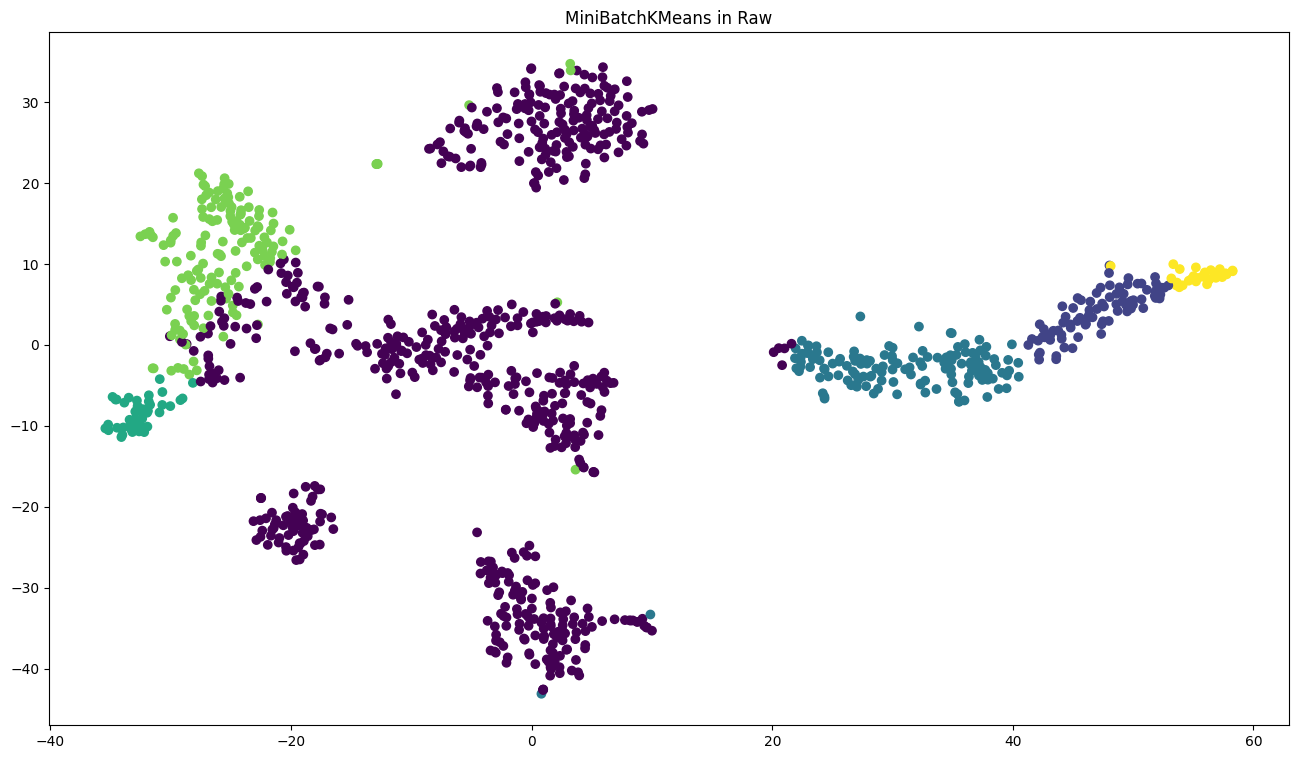

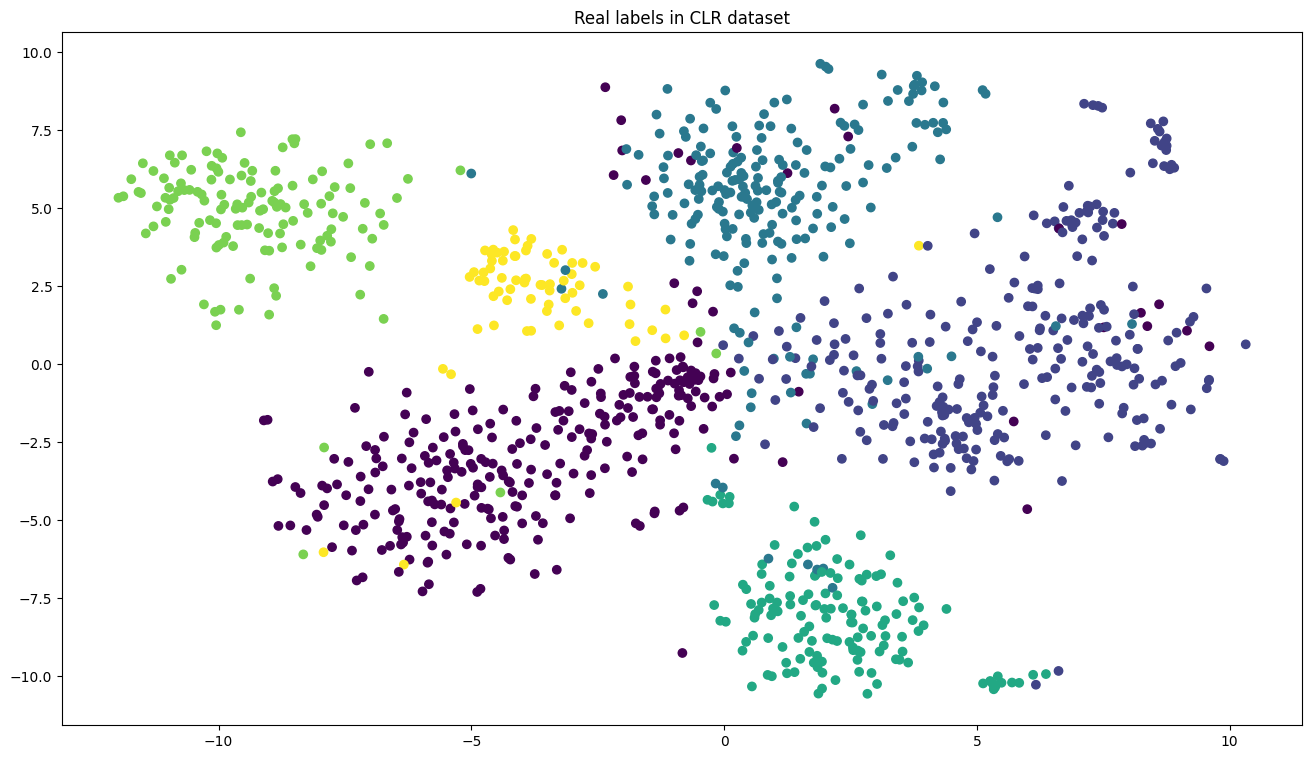

/opt/homebrew/Caskroom/miniconda/base/envs/py3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


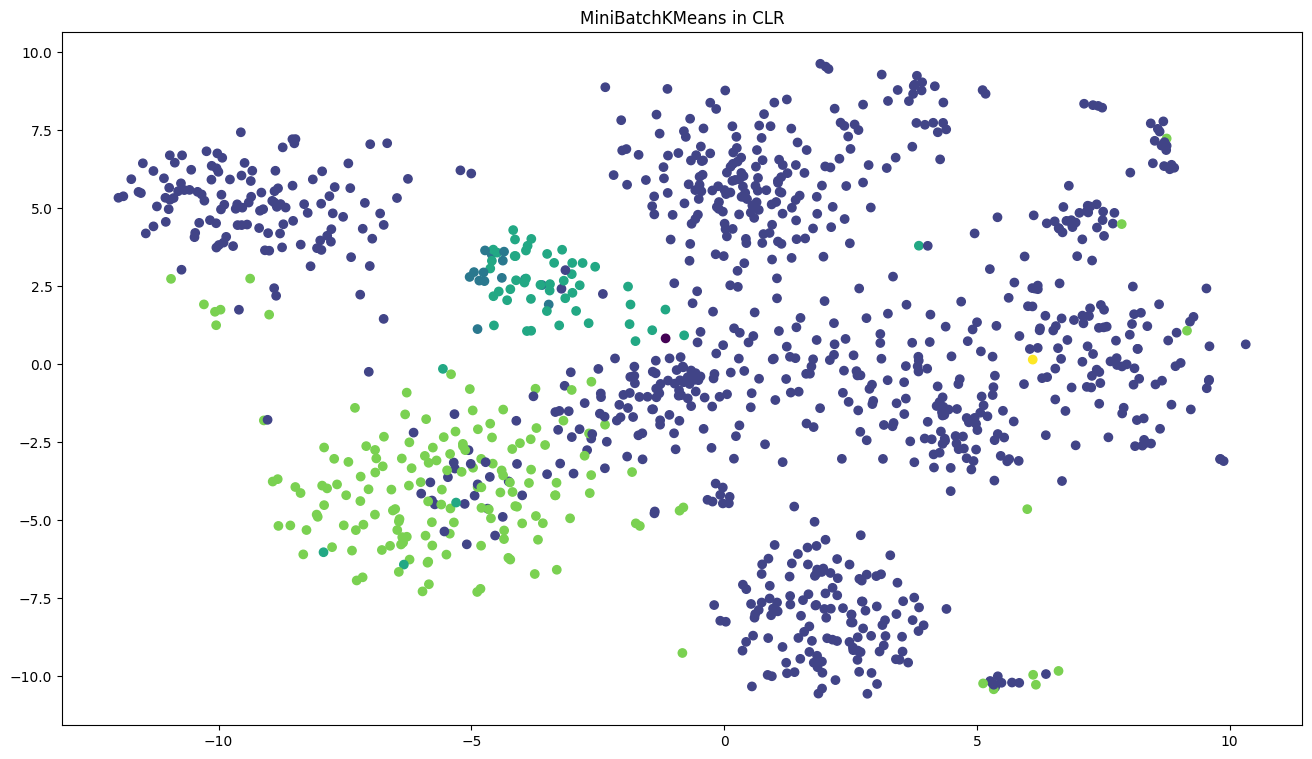

In [65]:
for model in models:
    model_name = model.__class__.__name__
    showRaw()
    visulization(pts_raw, 
                 model.fit_predict(X_raw),
                 model_name + " in Raw")
    
    showCLR()
    visulization(pts_trans, 
                 model.fit_predict(X_trans), 
                 model_name + " in CLR")